# SUPERMARKET CUSTOMER ANALYSIS

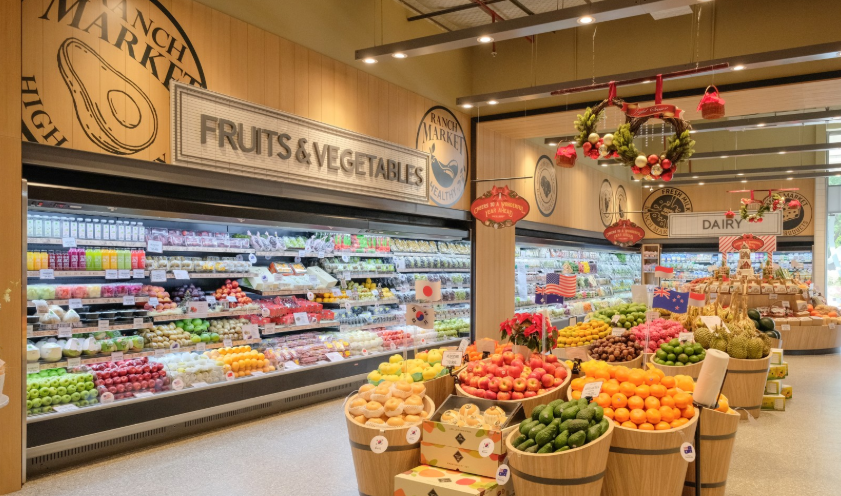

By: Yora Okta Aviani Rahardjo 

## Business Understanding

<span style="font-size:20px; font-family: monospace;">`1. Background`</span>

In facing increasingly intense competition in the supermarket retail industry, companies need to deeply understand customer segmentation. The RFM (Recency, Frequency, Monetary) method is an appropriate approach for analyzing the time of the last purchase, transaction frequency, and the total purchase value of customers. By analyzing customer data from 2012 to 2014 and comparing the effectiveness between customer segments and their responses to marketing campaigns, companies can develop more accurate promotional strategies to enhance loyalty and increase sales.


<span style="font-size:20px; font-family: monospace;">`2. Stakeholder`</span>

1. Management Executive
2. Marketing Team


<span style="font-size:20px; font-family: monospace;">`3. Business Problem`</span>


1. Which customer and product segments contribute the most to revenue?
2. How can we understand customer preferences and value that impact company performance?
3. How effective are marketing campaigns in driving sales?

<span style="font-size:20px; font-family: monospace;">`4. Goals`</span>

1. Identify customer and product segments in the supermarket that significantly contribute to revenue.
2. Analyze customer segmentation using the RFM (Recency, Frequency, Monetary) method.
3. Measure campaign effectiveness and design targeted promotional strategies based on customer segmentation.

## Data Understanding

### Data Overview

Is the dataset of Supermarket Customers from 2012 to 2014.

#### People

| Column              | Description                                                   |
| ------------------- | ------------------------------------------------------------- |
| **ID**              | Customer's unique identifier                                  |
| **Year\_Birth**     | Customer's birth year                                         |
| **Education**       | Customer education level                                      |
| **Marital\_Status** | Customer's marital status                                     |
| **Income**          | Customer's yearly household income                            |
| **Kidhome**         | Number of children in customer's household                    |
| **Teenhome**        | Number of teenagers in customer's household                   |
| **Dt\_Customer**    | Date of customer's enrollment with the company                |
| **Recency**         | Number of days since customer's last purchase                 |
| **Complain**        | 1 if the customer complained in the last 2 years, 0 otherwise |


#### Product

| Column               | Description                                |
| -------------------- | ------------------------------------------ |
| **MntWines**         | Amount spent on wine in the last 2 years   |
| **MntFruits**        | Amount spent on fruits in the last 2 years |
| **MntMeatProducts**  | Amount spent on meat in the last 2 years   |
| **MntFishProducts**  | Amount spent on fish in the last 2 years   |
| **MntSweetProducts** | Amount spent on sweets in the last 2 years |
| **MntGoldProds**     | Amount spent on gold in the last 2 years   |



#### Promotion

| Column                | Description                                                            |
| --------------------- | ---------------------------------------------------------------------- |
| **NumDealsPurchases** | Number of purchases made with a discount                               |
| **AcceptedCmp1**      | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise  |
| **AcceptedCmp2**      | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise  |
| **AcceptedCmp3**      | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise  |
| **AcceptedCmp4**      | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise  |
| **AcceptedCmp5**      | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise  |
| **Response**          | 1 if the customer accepted the offer in the last campaign, 0 otherwise |


#### Place

| Column                | Description                                                 |
| ----------------------- | ----------------------------------------------------------- |
| **NumWebPurchases**     | Number of purchases made through the company’s website      |
| **NumCatalogPurchases** | Number of purchases made using a catalog                    |
| **NumStorePurchases**   | Number of purchases made directly in stores                 |
| **NumWebVisitsMonth**   | Number of visits to the company’s website in the last month |


#### Import Library

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import squarify
from scipy.stats import kstest
import datetime as dt

from datetime import timedelta
from datetime import datetime 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)

#### Load Dataset

In [19]:
df=pd.read_csv("supermarket_customers.csv", sep="\t")
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

### Data Cleansing

1. Handling Missing Value
2. Handling Duplicate Data 
3. Handling Outliers Data


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [22]:
# Ckeck Missing Value

In [23]:
pd.DataFrame(df.isna().sum()).rename(columns={0:'Missing Value Count'}).sort_values('Missing Value Count',ascending=False)

Missing Value Count
Income                                24
ID                                     0
NumDealsPurchases                      0
Z_Revenue                              0
Z_CostContact                          0
Complain                               0
AcceptedCmp2                           0
AcceptedCmp1                           0
AcceptedCmp5                           0
AcceptedCmp4                           0
AcceptedCmp3                           0
NumWebVisitsMonth                      0
NumStorePurchases                      0
NumCatalogPurchases                    0
NumWebPurchases                        0
MntGoldProds                           0
Year_Birth                             0
MntSweetProducts                       0
MntFishProducts                        0
MntMeatProducts                        0
MntFruits                              0
MntWines                               0
Recency                                0
Dt_Customer                            0
Teenhome                               0
Kidhome                                0
Marital_Status                         0
Education                              0
Response                               0

In [24]:
round(pd.DataFrame(df.isna().sum()).rename(columns={0:'Missing Value Count'}).sort_values('Missing Value Count',ascending=False)/len(df)*100,2)

Missing Value Count
Income                              1.07
ID                                  0.00
NumDealsPurchases                   0.00
Z_Revenue                           0.00
Z_CostContact                       0.00
Complain                            0.00
AcceptedCmp2                        0.00
AcceptedCmp1                        0.00
AcceptedCmp5                        0.00
AcceptedCmp4                        0.00
AcceptedCmp3                        0.00
NumWebVisitsMonth                   0.00
NumStorePurchases                   0.00
NumCatalogPurchases                 0.00
NumWebPurchases                     0.00
MntGoldProds                        0.00
Year_Birth                          0.00
MntSweetProducts                    0.00
MntFishProducts                     0.00
MntMeatProducts                     0.00
MntFruits                           0.00
MntWines                            0.00
Recency                             0.00
Dt_Customer                         0.00
Teenhome                            0.00
Kidhome                             0.00
Marital_Status                      0.00
Education                           0.00
Response                            0.00

In [25]:
# Mengisi Missing Value dengan median income per kelompok education

In [26]:
median_income = df.groupby('Education')['Income'].median()
median_income

Education
2n Cycle      46805.0
Basic         20744.0
Graduation    52028.5
Master        50943.0
PhD           55212.0
Name: Income, dtype: float64

In [27]:
df['Income'] = df['Income'].fillna(df['Education'].map(median_income))

In [28]:
df['Income'].isna().sum()

0

In [29]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [30]:
# Check Dulpicate Values

In [31]:
df.duplicated().sum()

0

In [32]:
# Check duplikat berdasarkan semua kolom kecuali 'ID' 
duplicate_rows = df.loc[df.drop('ID', axis=1).duplicated(keep=False)]
duplicate_rows = duplicate_rows.sort_values('Income')
duplicate_rows

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
30     6864        1989      Master       Divorced  10979.0        0   
1138  10617        1989      Master       Divorced  10979.0        0   
1203    234        1979  Graduation       Divorced  15287.0        1   
260   10264        1979  Graduation       Divorced  15287.0        1   
558    8420        1970    2n Cycle        Married  15315.0        0   
...     ...         ...         ...            ...      ...      ...   
824    5536        1959  Graduation       Together  87771.0        0   
1301   6024        1953  Graduation       Together  94384.0        0   
943    5386        1953  Graduation       Together  94384.0        0   
650    4248        1960      Master         Single  98777.0        0   
1113   7451        1960      Master         Single  98777.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
30           0  22-05-2014       34         8          4               10   
1138         0  22-05-2014       34         8          4               10   
1203         0  10-10-2012       60         1          2                8   
260          0  10-10-2012       60         1          2                8   
558          0  03-08-2013       27         7          4               13   
...        ...         ...      ...       ...        ...              ...   
824          1  22-05-2013       61      1492         38              287   
1301         0  04-03-2013       62      1111         24              790   
943          0  04-03-2013       62      1111         24              790   
650          0  17-02-2014       23      1000         19              711   
1113         0  17-02-2014       23      1000         19              711   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
30                  2                 2             4                  2   
1138                2                 2             4                  2   
1203                4                 3            13                  2   
260                 4                 3            13                  2   
558                15                 8            17                  2   
...               ...               ...           ...                ...   
824                50                57            33                  1   
1301              160                45           172                  0   
943               160                45           172                  0   
650               125               115            38                  0   
1113              125               115            38                  0   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
30                  3                    0                  3   
1138                3                    0                  3   
1203                1                    1                  2   
260                 1                    1                  2   
558                 2                    0                  4   
...               ...                  ...                ...   
824                 5                   10                  4   
1301                5                    8                  5   
943                 5                    8                  5   
650                 4                    6                  9   
1113                4                    6                  9   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
30                    5             0             0             0   
1138                  5             0             0             0   
1203                  7             1             0             0   
260                   7             1             0             0   
558                   5             0             0             0   
...                 ...           ...           ...           ...   
824                   6             0     

In [33]:
# Hapus duplikat dan hanya baris pertama yang disimpan.
df = df.drop_duplicates(subset=[col for col in df.columns if col != 'ID'], keep='first')
df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
...     ...         ...         ...            ...       ...      ...   
2233   9432        1977  Graduation       Together  666666.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2238   8235        1956      Master       Together   69245.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2233         0  02-06-2013       23         9         14               18   
2235         1  13-06-2013       46       709         43              182   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2233                8                 1            12                  4   
2235               42               118           247                  2   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2233                3                    1                  3   
2235                9                    3                  4   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2233                  6       

In [34]:
num_col = df.select_dtypes(include=['number']).columns
num_col

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [35]:
df_num = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']]
df_num

Year_Birth    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1957   58138.0        0         0       58       635         88   
1           1954   46344.0        1         1       38        11          1   
2           1965   71613.0        0         0       26       426         49   
3           1984   26646.0        1         0       26        11          4   
4           1981   58293.0        1         0       94       173         43   
...          ...       ...      ...       ...      ...       ...        ...   
2233        1977  666666.0        1         0       23         9         14   
2235        1967   61223.0        0         1       46       709         43   
2237        1981   56981.0        0         0       91       908         48   
2238        1956   69245.0        0         1        8       428         30   
2239        1954   52869.0        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2233               18                8                 1            12   
2235              182               42               118           247   
2237              217               32                12            24   
2238              214               80                30            61   
2239               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2233                  4                3                    1   
2235                  2                9                    3   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  
0                     4                  7  
1                     2                  5  
2                    10                  4  
3                     4                  6  
4                     6                  5  
...                 ...                ...  
2233                  3                  6  
2235                  4                  5  
2237                 13                  6  
2238                 10                  3  
2239                  4                  7  

[2058 rows x 16 columns]

In [36]:
# Check Outliers

In [37]:
for col in df_num:
    print(f"Running for {col}")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

Running for Year_Birth
(3, 29)
Running for Income
(8, 29)
Running for Kidhome
(0, 29)
Running for Teenhome
(0, 29)
Running for Recency
(0, 29)
Running for MntWines
(33, 29)
Running for MntFruits
(207, 29)
Running for MntMeatProducts
(174, 29)
Running for MntFishProducts
(203, 29)
Running for MntSweetProducts
(225, 29)
Running for MntGoldProds
(187, 29)
Running for NumDealsPurchases
(78, 29)
Running for NumWebPurchases
(4, 29)
Running for NumCatalogPurchases
(22, 29)
Running for NumStorePurchases
(0, 29)
Running for NumWebVisitsMonth
(8, 29)


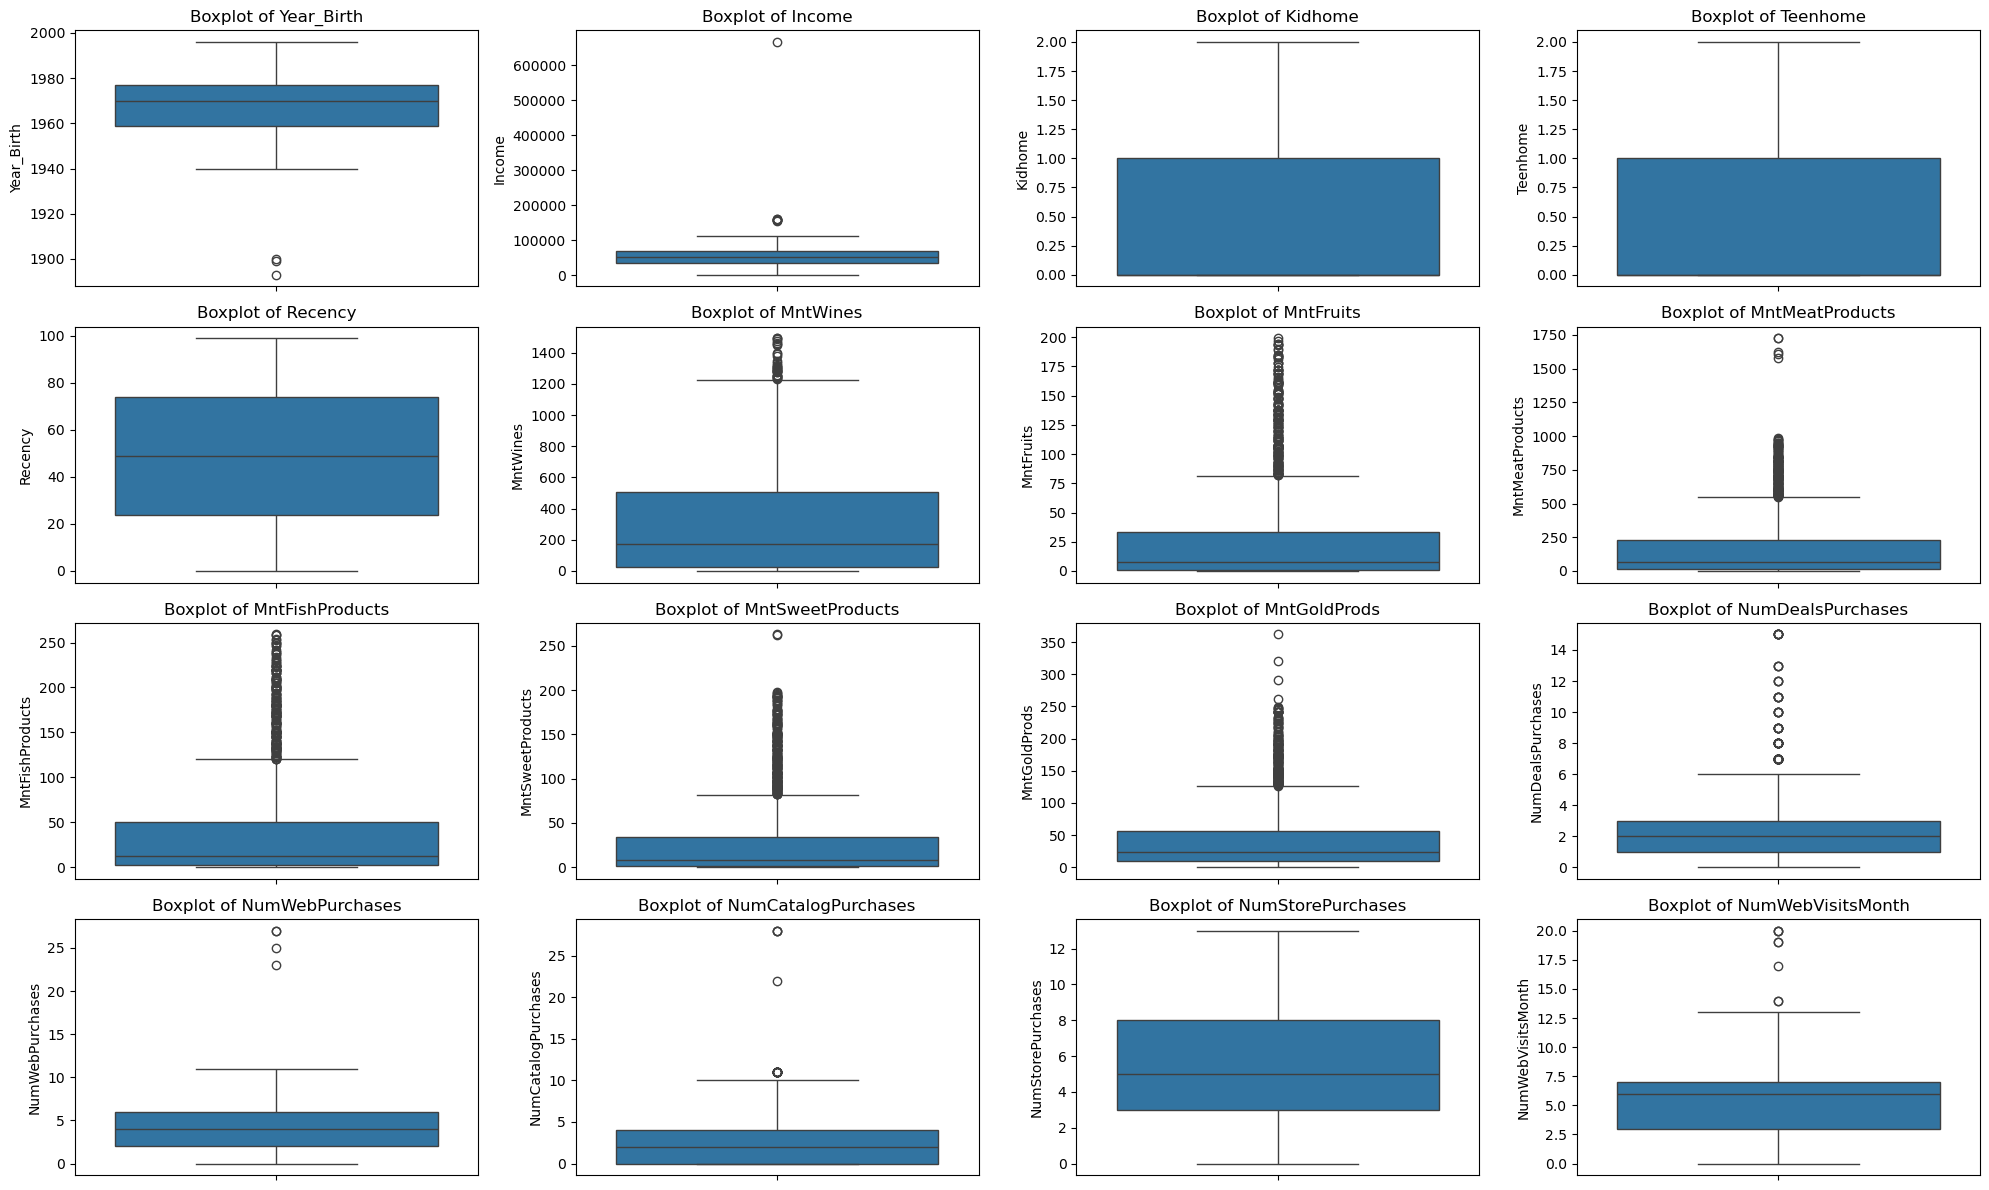

In [38]:
plt.figure(figsize=(20, 12))

for i, col in enumerate(df_num.columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(y=df_num[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [39]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1
fence_high = q3 + 1.5*iqr
fence_low = q1 - 1.5*iqr

# Filter data Income yang di luar batas (outlier)
outliers_income = df[(df['Income'] < fence_low) | (df['Income'] > fence_high)]

# Tampilkan baris data yang outlier di Income
print(outliers_income[['ID', 'Income']])

         ID    Income
164    8475  157243.0
617    1503  162397.0
655    5555  153924.0
687    1501  160803.0
1300   5336  157733.0
1653   4931  157146.0
2132  11181  156924.0
2233   9432  666666.0


In [40]:
# Handling Outliers

In [41]:
df[df['Income']>200000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2233         0  02-06-2013       23         9         14               18   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2233                8                 1            12                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2233                3                    1                  3   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2233                  6             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
2233             0             0         0              3         11         0

In [42]:
df[df['Year_Birth']<1920]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
192  26-09-2013       99        15          6                8   
239  17-05-2014       23         8          0                5   
339  26-09-2013       36       755        144              562   

     MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
192                7                 4            25                  1   
239                7                 0             2                  1   
339              104                64           224                  1   

     NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
192                2                    1                  2   
239                1                    0                  2   
339                4                    6                  4   

     NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
192                  5             0             0             0   
239                  4             0             0             0   
339                  1             0             0             1   

     AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  
192             0             0         1              3         11         0  
239             0             0         0              3         11         0  
339             0             0         0              3         11         0

In [43]:
df.drop(index=[2233, 192, 239, 339], inplace=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2232   8080        1986  Graduation         Single  26816.0        0   
2235  10870        1967  Graduation        Married  61223.0        0   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2232         0  17-08-2012       50         5          1                6   
2235         1  13-06-2013       46       709         43              182   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2232                3                 4             3                  1   
2235               42               118           247                  2   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2232                0                    0                  3   
2235                9                    3                  4   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2232                  4             0     

####  Adding Data Preparation 

In [45]:
df['ID'] = df['ID'].astype(str)

In [46]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')


In [47]:
df['year_month'] = pd.to_datetime(df['Dt_Customer'].dt.to_period('M').astype(str), format='%Y-%m')

In [48]:
print(df['Z_CostContact'].value_counts())
print(df['Z_Revenue'].value_counts())

Z_CostContact
3    2054
Name: count, dtype: int64
Z_Revenue
11    2054
Name: count, dtype: int64


In [49]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)


In [50]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalAmount'] = df[product_cols].sum(axis=1)


In [51]:
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

In [52]:
df['Year_Birth'].sort_values().unique()


array([1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951,
       1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996], dtype=int64)

In [53]:
bins = [1939, 1945, 1964, 1980, 1996]  
labels = ['Before Baby Boomers', 'Baby Boomers', 'Gen X', 'Millennial']

df['Generation'] = pd.cut(df['Year_Birth'], bins=bins, labels=labels, right=True)
df['Generation'].value_counts()

Generation
Gen X                  984
Baby Boomers           697
Millennial             350
Before Baby Boomers     23
Name: count, dtype: int64

In [54]:
df['FreqPurchasesPerChannel'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

In [55]:
df['AllResponse'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum(axis=1)

In [56]:
num_col = df.select_dtypes(include=['number']).columns
num_col

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'TotalAmount', 'Age',
       'FreqPurchasesPerChannel', 'AllResponse'],
      dtype='object')

In [57]:
cat_col = df.select_dtypes(exclude=['number']).columns
cat_col

Index(['ID', 'Education', 'Marital_Status', 'Dt_Customer', 'year_month',
       'Generation'],
      dtype='object')

In [58]:
df['Education'].value_counts()

Education
Graduation    1029
PhD            449
Master         341
2n Cycle       186
Basic           49
Name: count, dtype: int64

In [59]:
df['Education'].replace('2n Cycle', 'Master', inplace=True)
df['Education'].value_counts()

Education
Graduation    1029
Master         527
PhD            449
Basic           49
Name: count, dtype: int64

In [60]:
df['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    519
Single      447
Divorced    215
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [61]:
df['Marital_Status'].replace('Widow', 'Divorced', inplace=True)
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('Absurd', 'Together', inplace=True)
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
df['Marital_Status'].value_counts()

Marital_Status
Married     795
Together    521
Single      452
Divorced    286
Name: count, dtype: int64

In [62]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children'].value_counts()

Children
1    1042
0     576
2     388
3      48
Name: count, dtype: int64

In [63]:
df = df.drop(columns=['Kidhome', 'Teenhome'])

In [64]:
bins = [0, 35000, 70000, float('inf')]
labels = ['Low', 'Mid', 'High']

df['CategoryIncome'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)


In [65]:
df['CategoryIncome'].value_counts()

CategoryIncome
Mid     1089
Low      499
High     466
Name: count, dtype: int64

## EDA

In [67]:
df

ID  Year_Birth   Education Marital_Status   Income Dt_Customer  \
0      5524        1957  Graduation         Single  58138.0  2012-09-04   
1      2174        1954  Graduation         Single  46344.0  2014-03-08   
2      4141        1965  Graduation       Together  71613.0  2013-08-21   
3      6182        1984  Graduation       Together  26646.0  2014-02-10   
4      5324        1981         PhD        Married  58293.0  2014-01-19   
...     ...         ...         ...            ...      ...         ...   
2232   8080        1986  Graduation         Single  26816.0  2012-08-17   
2235  10870        1967  Graduation        Married  61223.0  2013-06-13   
2237   7270        1981  Graduation       Divorced  56981.0  2014-01-25   
2238   8235        1956      Master       Together  69245.0  2014-01-24   
2239   9405        1954         PhD        Married  52869.0  2012-10-15   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          58       635         88              546              172   
1          38        11          1                6                2   
2          26       426         49              127              111   
3          26        11          4               20               10   
4          94       173         43              118               46   
...       ...       ...        ...              ...              ...   
2232       50         5          1                6                3   
2235       46       709         43              182               42   
2237       91       908         48              217               32   
2238        8       428         30              214               80   
2239       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2232                 4             3                  1                0   
2235               118           247                  2                9   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2232                    0                  3                  4             0   
2235                    3                  4                  5             0   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2054 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2054 non-null   object        
 1   Year_Birth               2054 non-null   int64         
 2   Education                2054 non-null   object        
 3   Marital_Status           2054 non-null   object        
 4   Income                   2054 non-null   float64       
 5   Dt_Customer              2054 non-null   datetime64[ns]
 6   Recency                  2054 non-null   int64         
 7   MntWines                 2054 non-null   int64         
 8   MntFruits                2054 non-null   int64         
 9   MntMeatProducts          2054 non-null   int64         
 10  MntFishProducts          2054 non-null   int64         
 11  MntSweetProducts         2054 non-null   int64         
 12  MntGoldProds             2054 non-null 

In [69]:
df.describe()

Year_Birth         Income                    Dt_Customer      Recency  \
count  2054.000000    2054.000000                           2054  2054.000000   
mean   1968.887537   52041.008520  2013-07-11 07:53:55.443037952    48.959104   
min    1940.000000    1730.000000            2012-07-30 00:00:00     0.000000   
25%    1959.000000   35691.250000            2013-01-17 00:00:00    24.000000   
50%    1970.000000   51609.500000            2013-07-12 00:00:00    49.000000   
75%    1977.000000   68146.500000            2014-01-01 00:00:00    74.000000   
max    1996.000000  162397.000000            2014-06-29 00:00:00    99.000000   
std      11.667729   21466.433514                            NaN    28.993680   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2054.000000  2054.000000      2054.000000      2054.000000   
mean    304.130477    26.205940       167.742454        37.340798   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.000000     1.000000        16.000000         3.000000   
50%     174.500000     8.000000        67.000000        12.000000   
75%     504.000000    33.000000       229.500000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   
std     336.522007    39.696792       228.280438        54.678618   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2054.000000   2054.000000        2054.000000      2054.000000   
mean          27.196203     43.830574           2.340312         4.101753   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.750000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   
std           41.735266     52.011038           1.943819         2.798975   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2054.000000        2054.000000        2054.000000   
mean              2.662123           5.776534           5.322298   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   
std               2.934710           3.239313           2.440189   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2054.000000   2054.000000   2054.000000   2054.000000   2054.000000   
mean       0.073515      0.076923      0.071568      0.065725      0.012658   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   
std        0.261044      0.266534      0.257833      0.247862      0.111822   

          Complain     Response                     year_month  TotalAmount  \
count  2054.000000  2054.000000                           2054  2054.000000   
mean      0.009250     0.152386  2013-06-26 15:55:33.592989184   606.446446   
min       0.000000     0.000000            2012-07-01 00:00:00     5.000000   
25%       0.000000     0.000000            2013-01-01 00:00:00    69.000000   
50%       0.000000     0.000000            2013-07-01 00:00:00   397.000000   
75%       0.000000     0.000000            2014-01-01 00:00:00  1046.500000   
max       1.000000     1.000000            2014-06-01 00:00:00  2525.000000   
std  

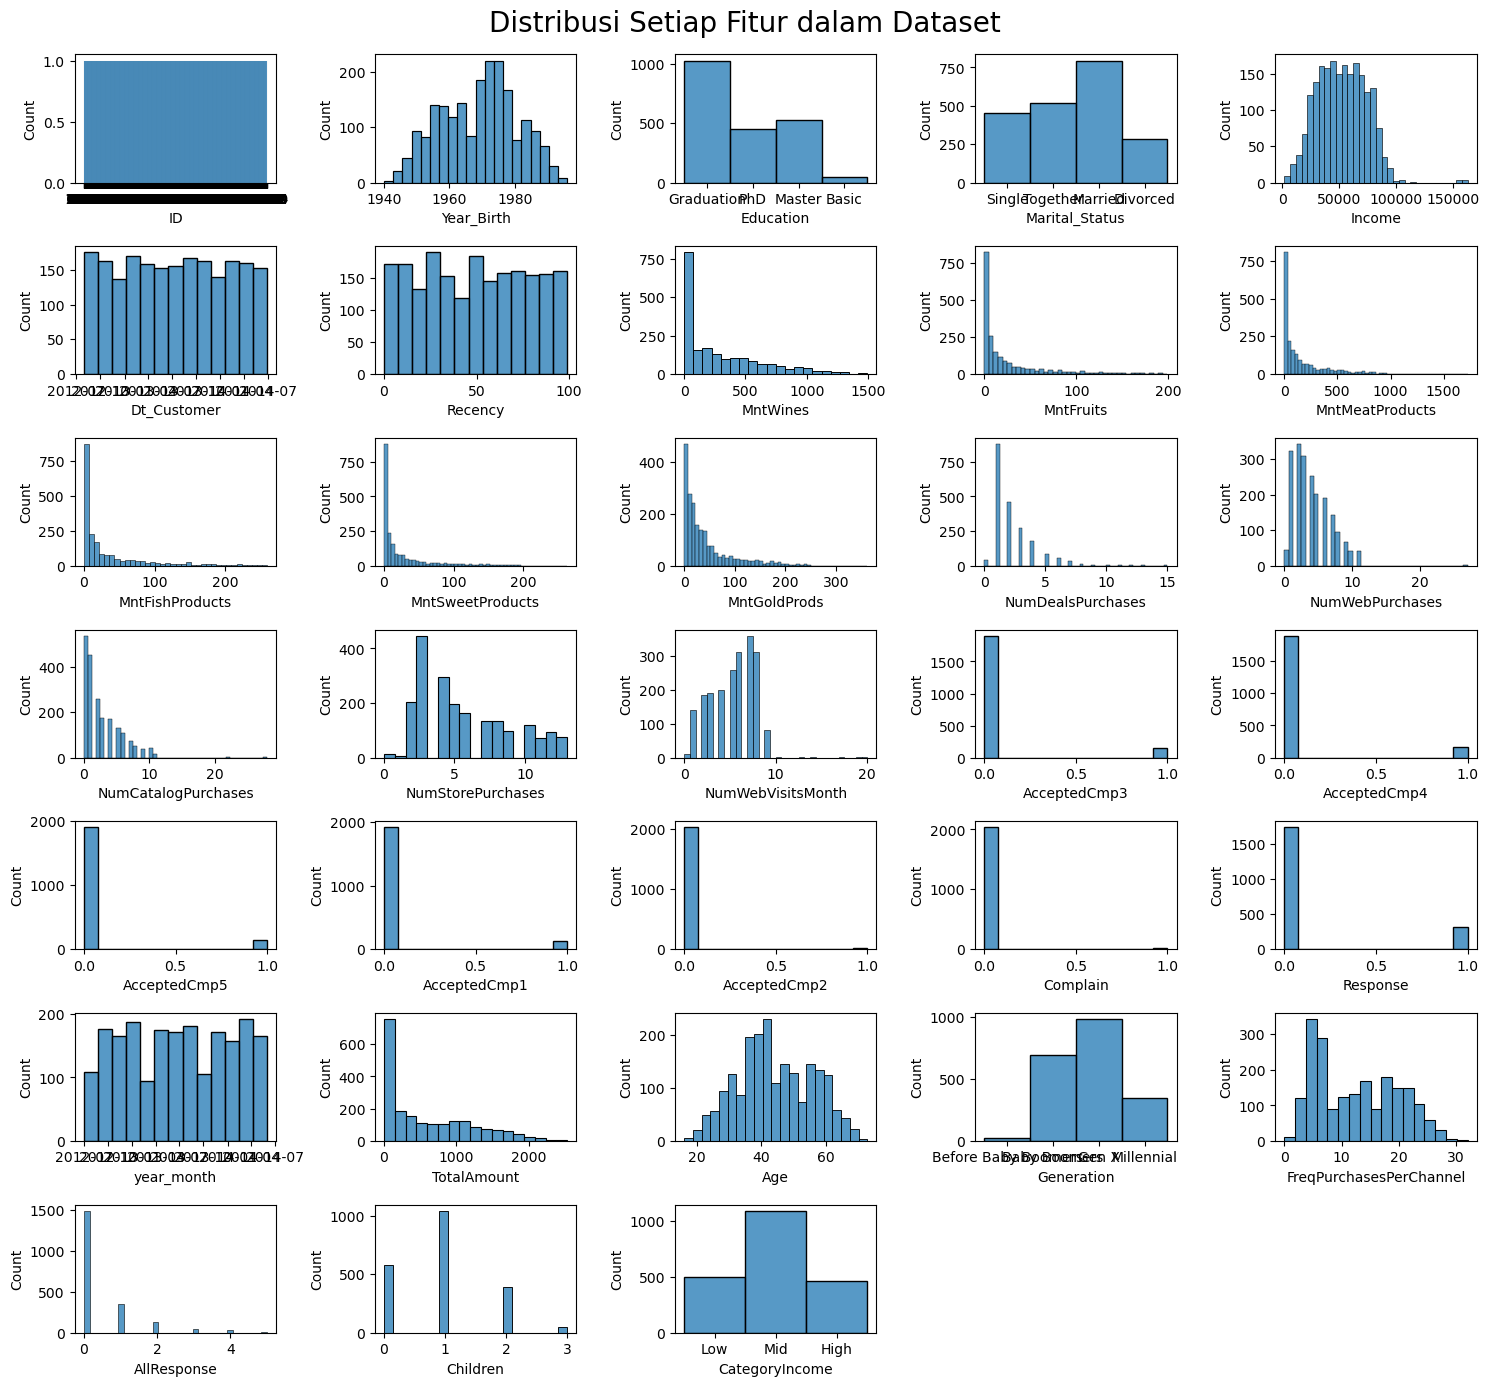

In [70]:
plt.figure(figsize = (15,15))
for i in range(len(df.columns)):
    plt.subplot(8,5,i+1)
    sns.histplot(x = df.columns[i], data = df)
    plt.tight_layout()
plt.suptitle('Distribusi Setiap Fitur dalam Dataset', fontsize=20, y=1.02)
plt.show()

In [71]:
num_cols = [
    'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'Complain', 'Response', 'TotalAmount', 'Age', 'FreqPurchasesPerChannel', 'Children'
]

In [72]:
correlation_matrix = df[num_cols].corr()

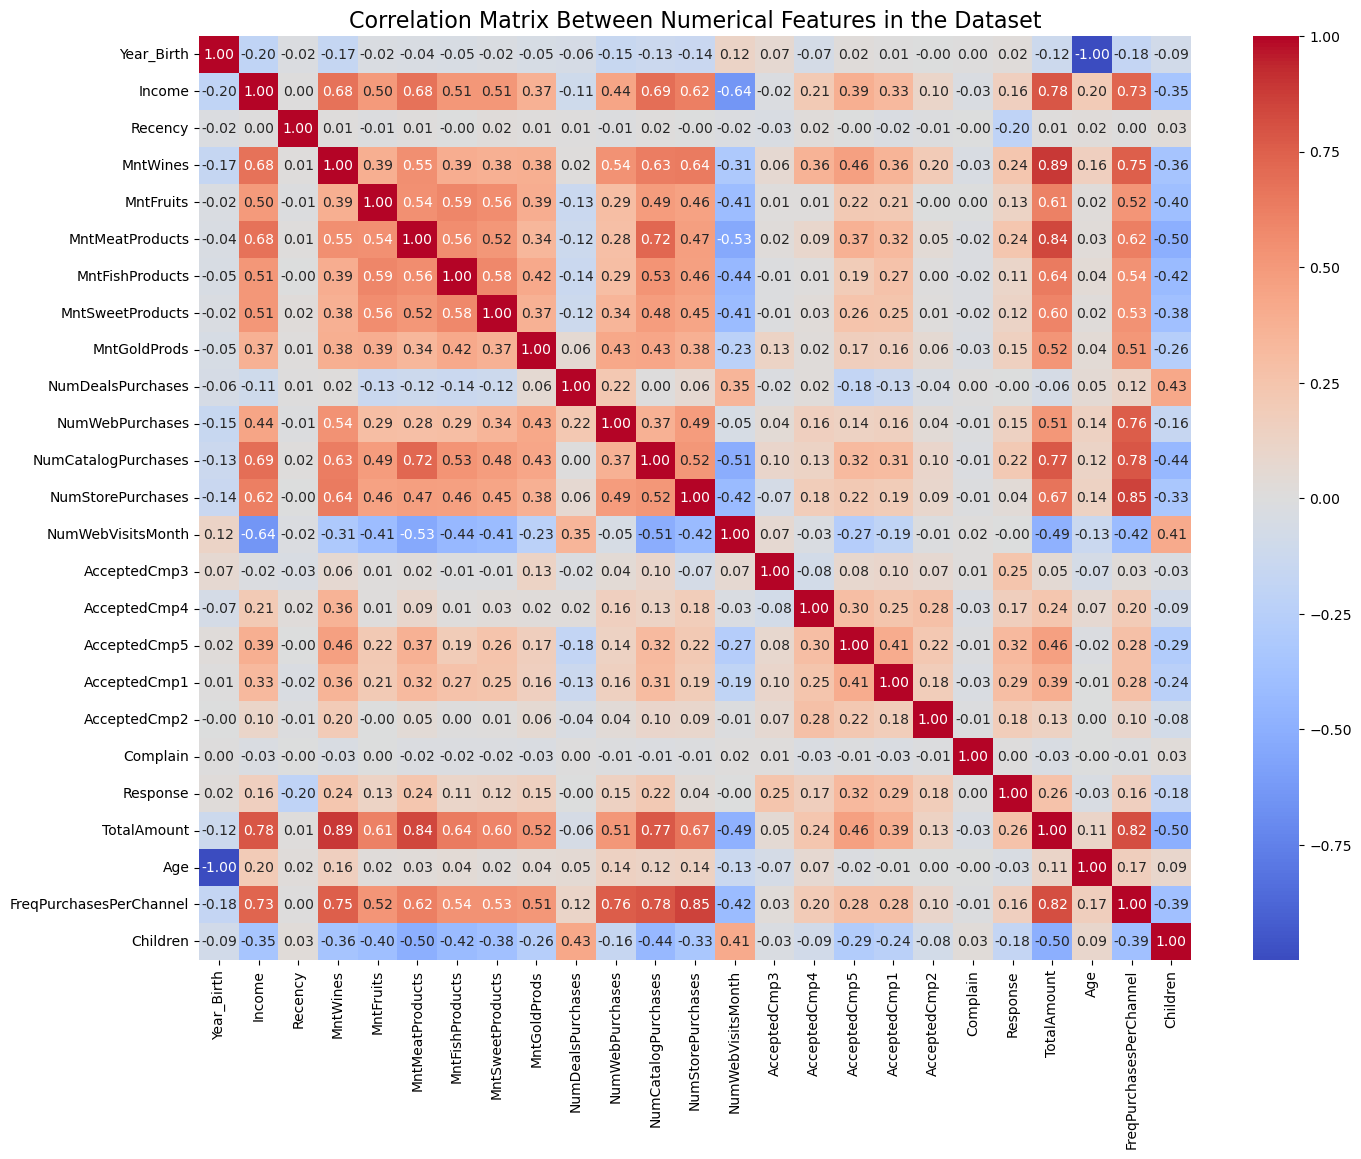

In [73]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Numerical Features in the Dataset', fontsize=16)
plt.show()


#### RFM Generation

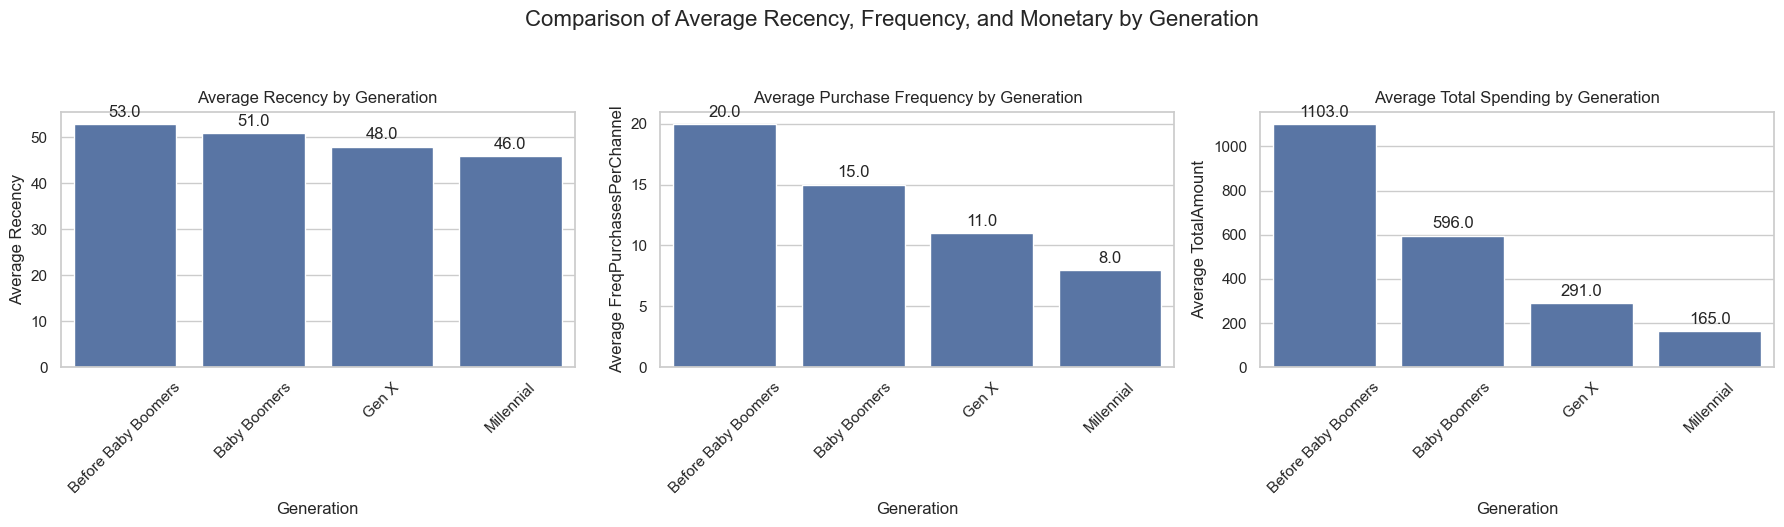

In [75]:
sns.set(style="whitegrid")

metrics = ['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']
titles = [
    'Average Recency by Generation',
    'Average Purchase Frequency by Generation',
    'Average Total Spending by Generation'
]

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    mean_metric = df.groupby('Generation')[metric].median().sort_values(ascending=False)
    plt.subplot(1, 3, i + 1)
    ax = sns.barplot(x=mean_metric.index, y=mean_metric.values)
    plt.title(titles[i])
    plt.xlabel('Generation')
    plt.ylabel(f'Average {metric}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.suptitle('Comparison of Average Recency, Frequency, and Monetary by Generation', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


#### RFM Education

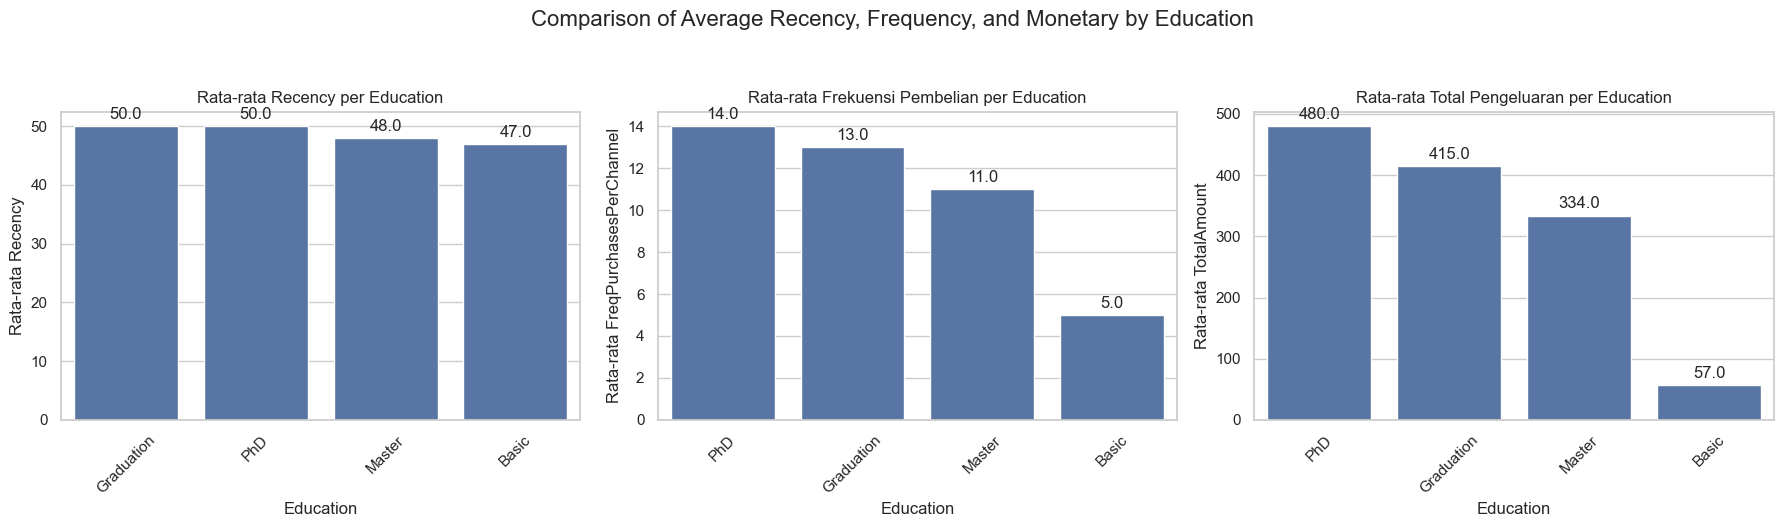

In [77]:
sns.set(style="whitegrid")

metrics = ['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']
titles = [
    'Rata-rata Recency per Education',
    'Rata-rata Frekuensi Pembelian per Education',
    'Rata-rata Total Pengeluaran per Education'
]

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):

    mean_metric = df.groupby('Education')[metric].median().sort_values(ascending=False)
    
    plt.subplot(1, 3, i + 1)
    ax = sns.barplot(x=mean_metric.index, y=mean_metric.values)

    plt.title(titles[i])
    plt.xlabel('Education')
    plt.ylabel(f'Rata-rata {metric}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # offset 3 pt di atas bar
                    textcoords='offset points',
                    ha='center', va='bottom')
        
plt.suptitle('Comparison of Average Recency, Frequency, and Monetary by Education', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


#### RFM Marital Status

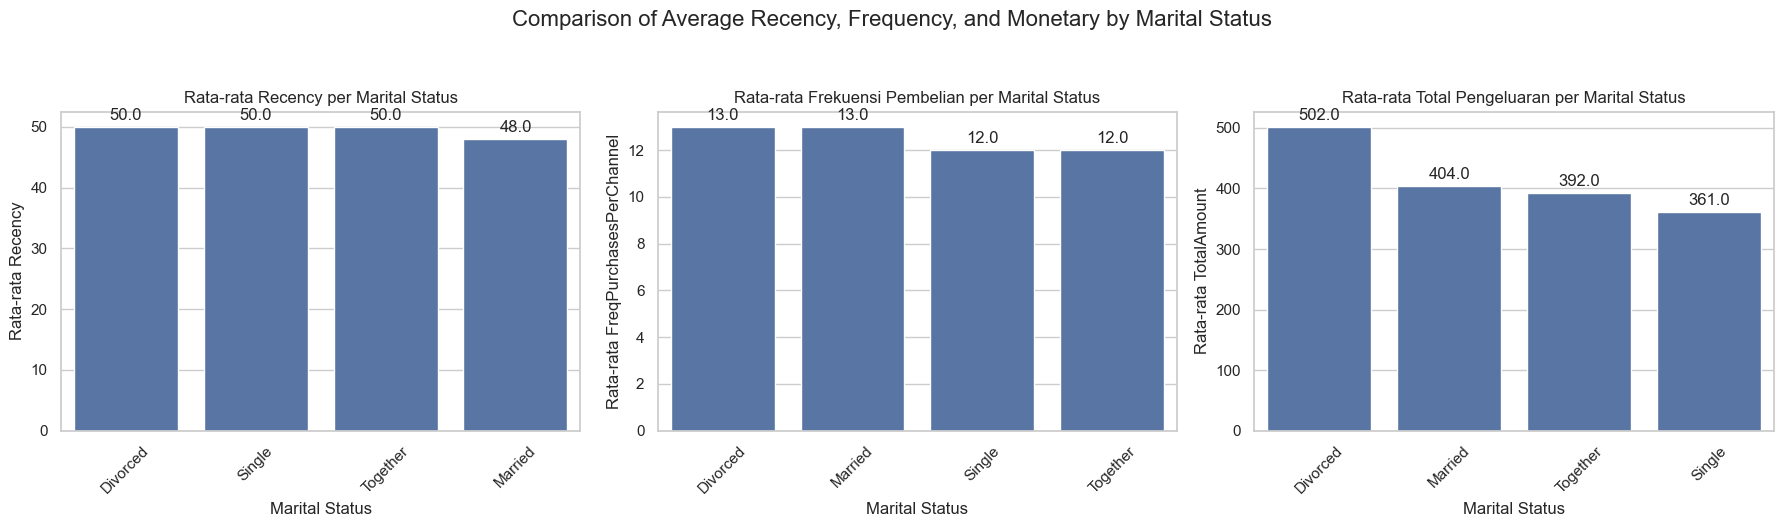

In [79]:
sns.set(style="whitegrid")

metrics = ['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']
titles = [
    'Rata-rata Recency per Marital Status',
    'Rata-rata Frekuensi Pembelian per Marital Status',
    'Rata-rata Total Pengeluaran per Marital Status'
]

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    mean_metric = df.groupby('Marital_Status')[metric].median().sort_values(ascending=False)

    plt.subplot(1, 3, i + 1)
    ax = sns.barplot(x=mean_metric.index, y=mean_metric.values)

    plt.title(titles[i])
    plt.xlabel('Marital Status')
    plt.ylabel(f'Rata-rata {metric}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')
        
plt.suptitle('Comparison of Average Recency, Frequency, and Monetary by Marital Status', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


#### RFM Children

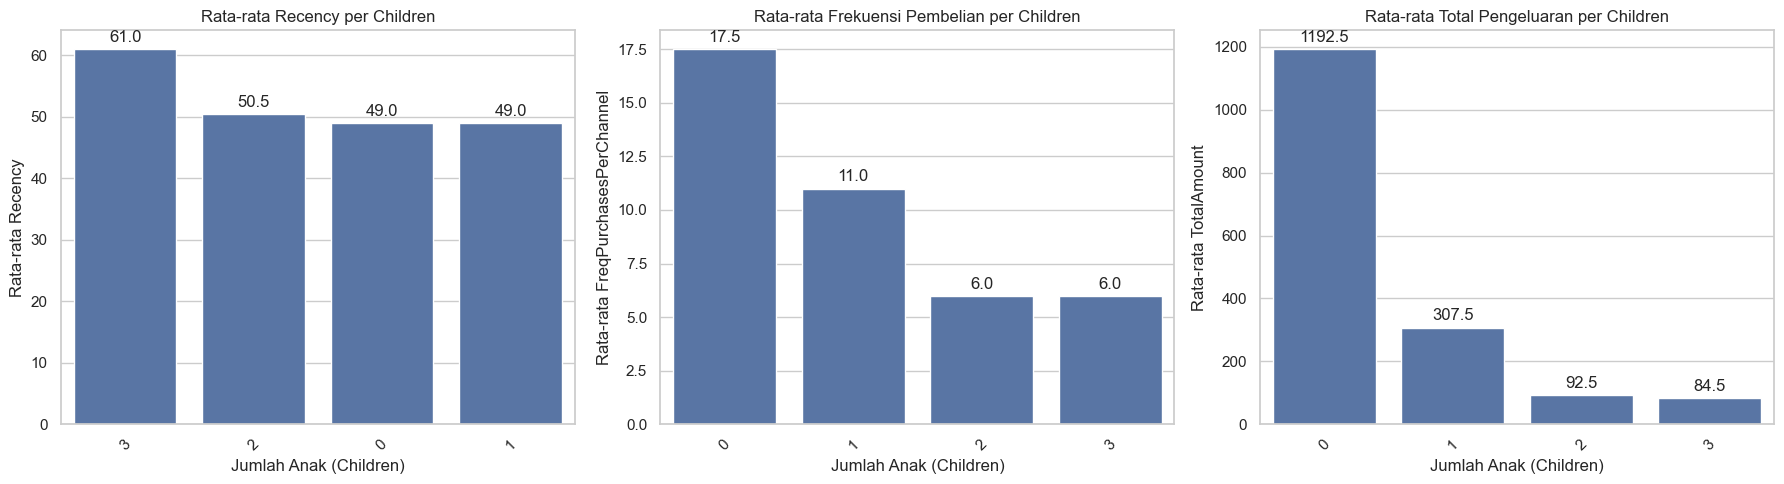

In [81]:
sns.set(style="whitegrid")

metrics = ['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']
titles = [
    'Rata-rata Recency per Children',
    'Rata-rata Frekuensi Pembelian per Children',
    'Rata-rata Total Pengeluaran per Children'
]

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    mean_metric = df.groupby('Children')[metric].median().sort_values(ascending=False)

    plt.subplot(1, 3, i + 1)
    ax = sns.barplot(x=mean_metric.index.astype(str), y=mean_metric.values)  # pastikan x-axis str

    plt.title(titles[i])
    plt.xlabel('Jumlah Anak (Children)')
    plt.ylabel(f'Rata-rata {metric}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### RFM Category Income

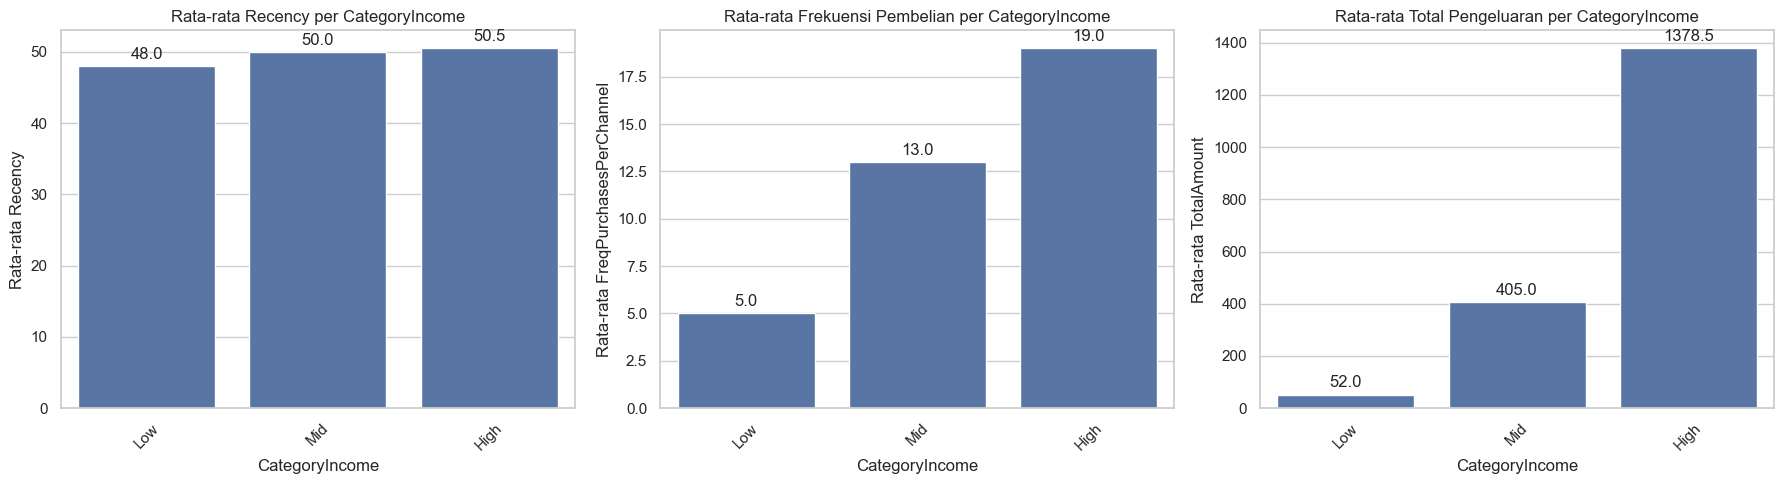

In [83]:
sns.set(style="whitegrid")

metrics = ['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']
titles = [
    'Rata-rata Recency per CategoryIncome',
    'Rata-rata Frekuensi Pembelian per CategoryIncome',
    'Rata-rata Total Pengeluaran per CategoryIncome'
]

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    mean_metric = df.groupby('CategoryIncome')[metric].median().sort_values(ascending=False)

    plt.subplot(1, 3, i + 1)
    ax = sns.barplot(x=mean_metric.index, y=mean_metric.values)

    plt.title(titles[i])
    plt.xlabel('CategoryIncome')
    plt.ylabel(f'Rata-rata {metric}')
    plt.xticks(rotation=45)

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [84]:
total_revenue = df['TotalAmount'].sum()
print(f"Total revenue Keseluruhan: ${total_revenue:,.2f}")

Total revenue Keseluruhan: $1,245,641.00


In [85]:
monthly_amount = df.groupby('year_month')['TotalAmount'].sum().reset_index()
monthly_amount

year_month  TotalAmount
0  2012-07-01         1357
1  2012-08-01        83677
2  2012-09-01        79185
3  2012-10-01        60309
4  2012-11-01        70148
5  2012-12-01        46014
6  2013-01-01        67316
7  2013-02-01        63176
8  2013-03-01        63079
9  2013-04-01        54369
10 2013-05-01        62368
11 2013-06-01        43687
12 2013-07-01        46165
13 2013-08-01        50097
14 2013-09-01        44020
15 2013-10-01        56289
16 2013-11-01        55159
17 2013-12-01        47060
18 2014-01-01        47272
19 2014-02-01        39439
20 2014-03-01        46349
21 2014-04-01        41038
22 2014-05-01        46647
23 2014-06-01        31421

#### Normality Test of Total Amount

In [87]:
data = df['TotalAmount'].dropna()

data_std = (data - np.mean(data)) / np.std(data)

stat, p = kstest(data_std, 'norm')

print(f'Statistic={stat:.4f}, p-value={p:.4f}')

if p > 0.05:
    print("Data 'Total Amount' berdistribusi normal (gagal tolak H0)")
else:
    print("Data 'Total Amount' tidak berdistribusi normal (tolak H0)")


Statistic=0.1590, p-value=0.0000
Data 'Total Amount' tidak berdistribusi normal (tolak H0)


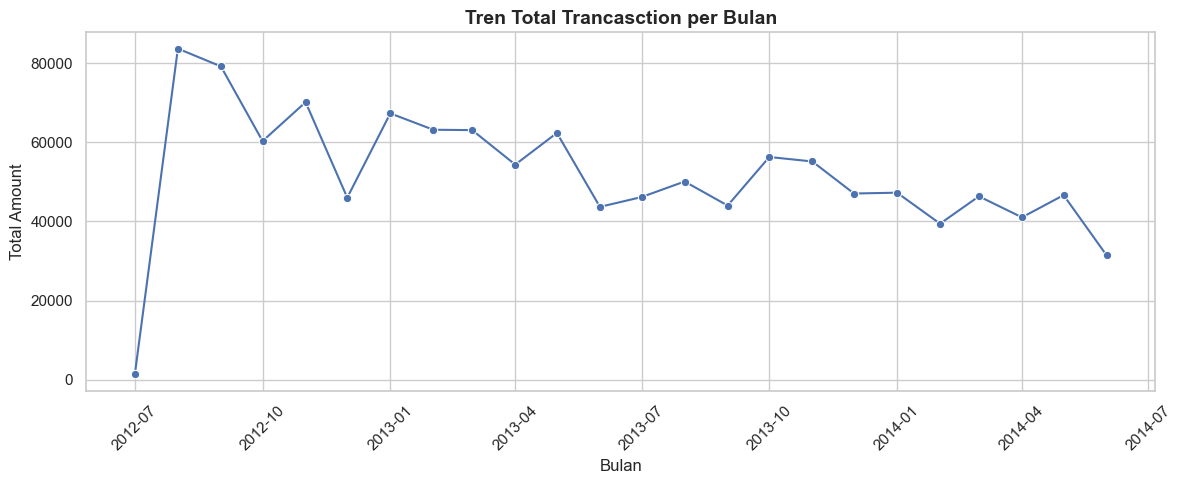

In [88]:
monthly_revenue = df.groupby('year_month')['TotalAmount'].sum().reset_index()

# Plot tren revenue
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_revenue, x='year_month', y='TotalAmount', marker='o')
plt.xticks(rotation=45)
plt.title('Tren Total Trancasction per Bulan', fontsize=14, weight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

### TTotal Transactions by Product Category

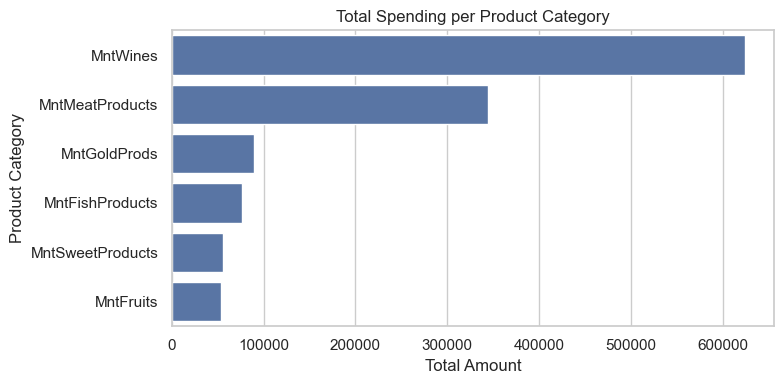

In [90]:
product_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
product_totals = df[product_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=product_totals.values, y=product_totals.index)
plt.title('Total Spending per Product Category')
plt.xlabel('Total Amount')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

In [91]:
import pandas as pd

product_cols = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

df_product = df.melt(value_vars=product_cols, 
                    var_name='Product_Category', 
                    value_name='Spending')

In [92]:
df_product = df_product.groupby('Product_Category')['Spending'].median().reset_index()
df_product

Product_Category  Spending
0   MntFishProducts      12.0
1         MntFruits       8.0
2      MntGoldProds      24.0
3   MntMeatProducts      67.0
4  MntSweetProducts       8.0
5          MntWines     174.5

### Correlation by Product

In [94]:
df_corr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 'TotalAmount']].corr(method='spearman').transpose()
df_corr

MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines          1.000000   0.513399         0.819817         0.521260   
MntFruits         0.513399   1.000000         0.712896         0.707749   
MntMeatProducts   0.819817   0.712896         1.000000         0.726438   
MntFishProducts   0.521260   0.707749         0.726438         1.000000   
MntSweetProducts  0.497978   0.689056         0.695658         0.703677   
MntGoldProds      0.573927   0.566726         0.635597         0.559955   
TotalAmount       0.925361   0.679652         0.938532         0.693575   

                  MntSweetProducts  MntGoldProds  TotalAmount  
MntWines                  0.497978      0.573927     0.925361  
MntFruits                 0.689056      0.566726     0.679652  
MntMeatProducts           0.695658      0.635597     0.938532  
MntFishProducts           0.703677      0.559955     0.693575  
MntSweetProducts          1.000000      0.539962     0.667292  
MntGoldProds              0.539962      1.000000     0.691453  
TotalAmount               0.667292      0.691453     1.000000

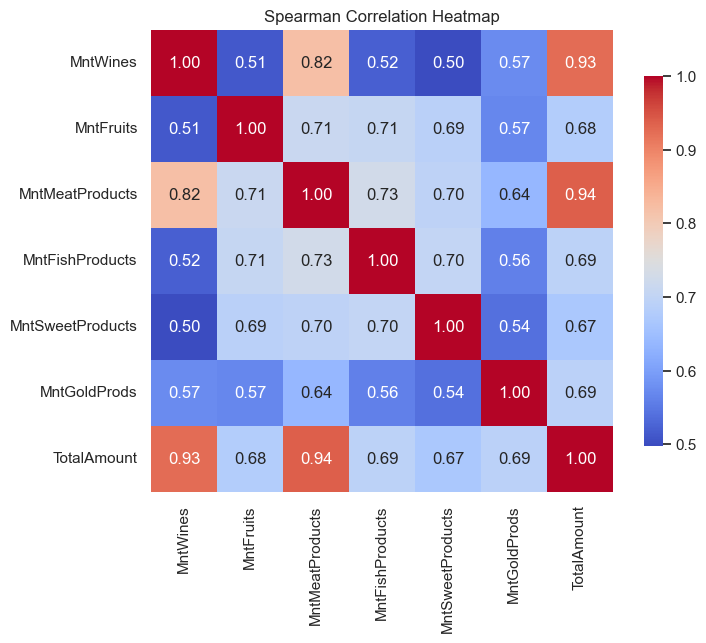

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data=df_corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": .8}
)
plt.title('Spearman Correlation Heatmap')
plt.show()

####  Products by Income Category

In [97]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

mean_products = df.groupby('CategoryIncome')[product_columns].median()

mean_products['Total'] = mean_products.sum(axis=1)

percentage_products = mean_products[product_columns].div(mean_products['Total'], axis=0) * 100

percentage_products = percentage_products.round(1)

print("Tabel Persentase Pengeluaran Produk per Category Income:")
display(percentage_products)

Tabel Persentase Pengeluaran Produk per Category Income:


MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
CategoryIncome                                                          
Low                 24.4        7.3             29.3              9.8   
Mid                 63.3        1.9             21.0              3.1   
High                48.2        3.8             33.9              5.8   

                MntSweetProducts  MntGoldProds  
CategoryIncome                                  
Low                          7.3          22.0  
Mid                          2.2           8.5  
High                         4.1           4.1

### Income vs Spending

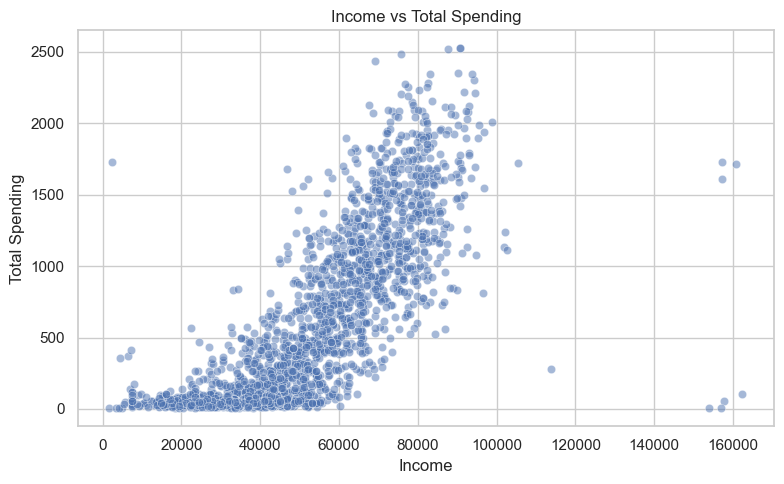

In [99]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Income', y='TotalAmount', alpha=0.5)
plt.title('Income vs Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()


#### Response (Last Response)

In [101]:
df_response = df[df['Response'] == 1]

num_responders = df_response.shape[0]
print(f'Jumlah pelanggan yang merespons: {num_responders}')

response_rate = (num_responders / len(df)) * 100
print(f'Response Rate: {response_rate:.2f}%')

df_no_response = df[df['Response'] == 0]

num_no_responders = df_no_response.shape[0]
print(f'Jumlah pelanggan yang tidak merespons: {num_no_responders}')

no_response_rate = (num_no_responders / len(df)) * 100
print(f'No Response Rate: {no_response_rate:.2f}%')

avg_spending_compare = df.groupby('Response')['TotalAmount'].mean()
print("\nRata-rata pengeluaran berdasarkan respons:")
print(avg_spending_compare)

total_spending_compare = df.groupby('Response')['TotalAmount'].sum()
print("\nTotal pengeluaran berdasarkan respons:")
print(total_spending_compare)

Jumlah pelanggan yang merespons: 313
Response Rate: 15.24%
Jumlah pelanggan yang tidak merespons: 1741
No Response Rate: 84.76%

Rata-rata pengeluaran berdasarkan respons:
Response
0    539.290638
1    979.987220
Name: TotalAmount, dtype: float64

Total pengeluaran berdasarkan respons:
Response
0    938905
1    306736
Name: TotalAmount, dtype: int64


In [102]:
monthly_total = df.groupby('year_month').size().reset_index(name='TotalCount')

monthly_response = df[df['Response'] == 1].groupby('year_month').size().reset_index(name='ResponseCount')

monthly_summary = pd.merge(monthly_total, monthly_response, on='year_month', how='left')

monthly_summary['ResponseCount'] = monthly_summary['ResponseCount'].fillna(0)

monthly_summary['ResponseRate'] = monthly_summary['ResponseCount'] / monthly_summary['TotalCount']

monthly_summary['year_month'] = monthly_summary['year_month'].astype(str)

print(monthly_summary[['year_month', 'TotalCount', 'ResponseCount', 'ResponseRate']])


    year_month  TotalCount  ResponseCount  ResponseRate
0   2012-07-01           2              1      0.500000
1   2012-08-01         107             31      0.289720
2   2012-09-01          90             33      0.366667
3   2012-10-01          87             24      0.275862
4   2012-11-01          90             22      0.244444
5   2012-12-01          76             13      0.171053
6   2013-01-01         100             19      0.190000
7   2013-02-01          88             14      0.159091
8   2013-03-01          95             15      0.157895
9   2013-04-01          80             15      0.187500
10  2013-05-01          95             14      0.147368
11  2013-06-01          79             11      0.139241
12  2013-07-01          92              9      0.097826
13  2013-08-01          95             13      0.136842
14  2013-09-01          86              5      0.058140
15  2013-10-01         105             12      0.114286
16  2013-11-01          84              9      0

### Total Responses per Campaign

In [104]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

for col in campaign_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())

Value counts for AcceptedCmp1:
AcceptedCmp1
0    1919
1     135
Name: count, dtype: int64
Value counts for AcceptedCmp2:
AcceptedCmp2
0    2028
1      26
Name: count, dtype: int64
Value counts for AcceptedCmp3:
AcceptedCmp3
0    1903
1     151
Name: count, dtype: int64
Value counts for AcceptedCmp4:
AcceptedCmp4
0    1896
1     158
Name: count, dtype: int64
Value counts for AcceptedCmp5:
AcceptedCmp5
0    1907
1     147
Name: count, dtype: int64
Value counts for Response:
Response
0    1741
1     313
Name: count, dtype: int64


### Monthly Campaign Response Trend

In [106]:
monthly_trend = df.groupby('year_month').agg({
    'ID': 'count',                  
    'Response': ['sum', 'mean']     
})

monthly_trend.columns = ['customer_count', 'response_count', 'response_rate']
monthly_trend = monthly_trend.reset_index()

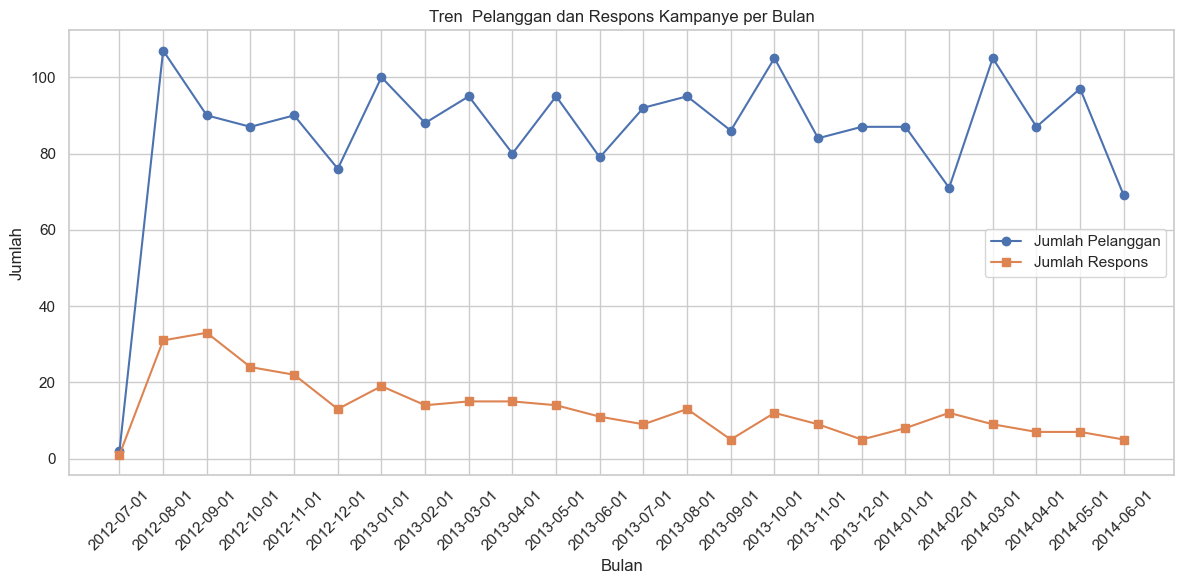

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['customer_count'], marker='o', label='Jumlah Pelanggan')
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['response_count'], marker='s', label='Jumlah Respons')
plt.title('Tren  Pelanggan dan Respons Kampanye per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Monthly Response Rate Trend

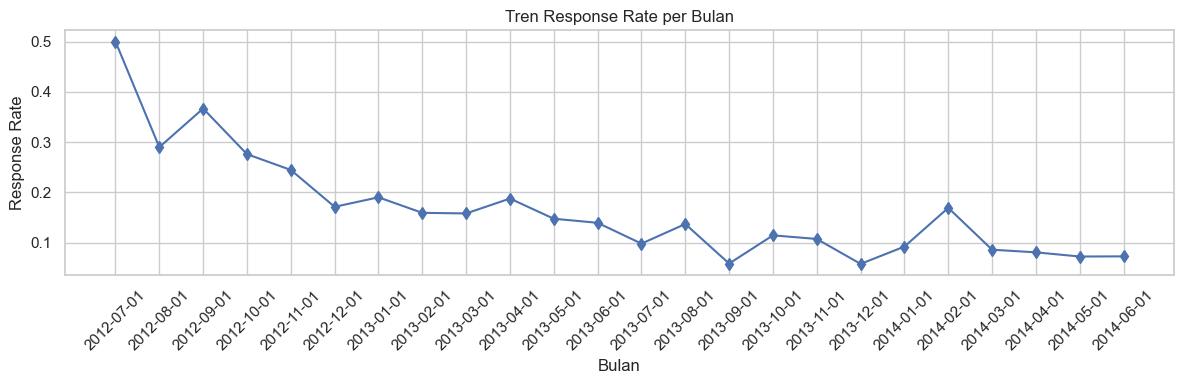

In [109]:
plt.figure(figsize=(12, 4))
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['response_rate'], marker='d')
plt.title('Tren Response Rate per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Recency vs Response

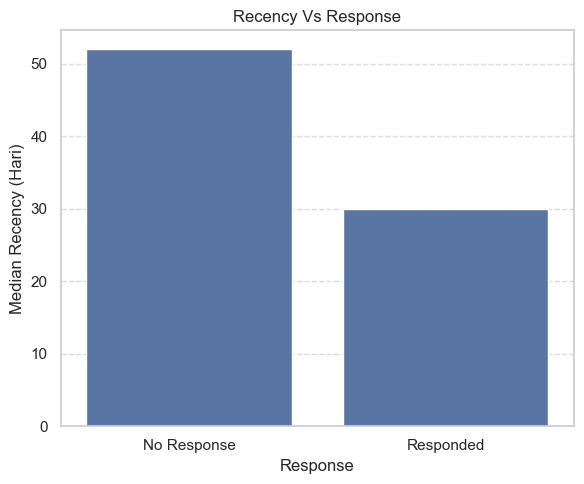

In [111]:
median_recency = df.groupby('Response')['Recency'].median().reset_index()

median_recency['Response_Label'] = median_recency['Response'].map({0: 'No Response', 1: 'Responded'})

plt.figure(figsize=(6, 5))
sns.barplot(data=median_recency, x='Response_Label', y='Recency')

plt.title('Recency Vs Response')
plt.ylabel('Median Recency (Hari)')
plt.xlabel('Response')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Total Amount by Response

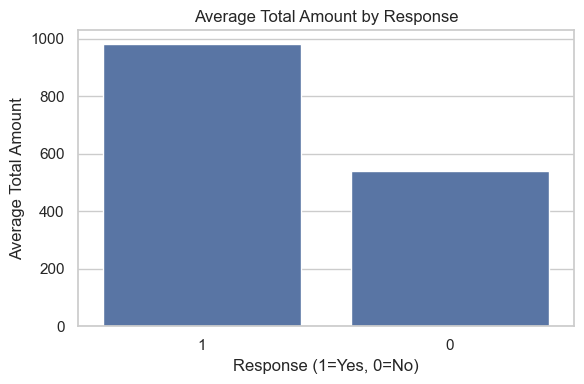

In [113]:
monetary_response = df.groupby('Response')['TotalAmount'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=monetary_response.index.astype(str), y=monetary_response.values)
plt.title('Average Total Amount by Response')
plt.ylabel('Average Total Amount')
plt.xlabel('Response (1=Yes, 0=No)')
plt.tight_layout()
plt.show()

### Average Children bt Response

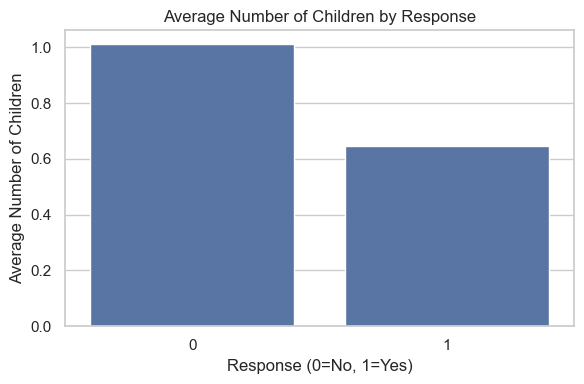

In [115]:
children_response = df.groupby('Response')['Children'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=children_response.index.astype(str), y=children_response.values)
plt.title('Average Number of Children by Response')
plt.xlabel('Response (0=No, 1=Yes)')
plt.ylabel('Average Number of Children')
plt.tight_layout()
plt.show()

### Demography Response

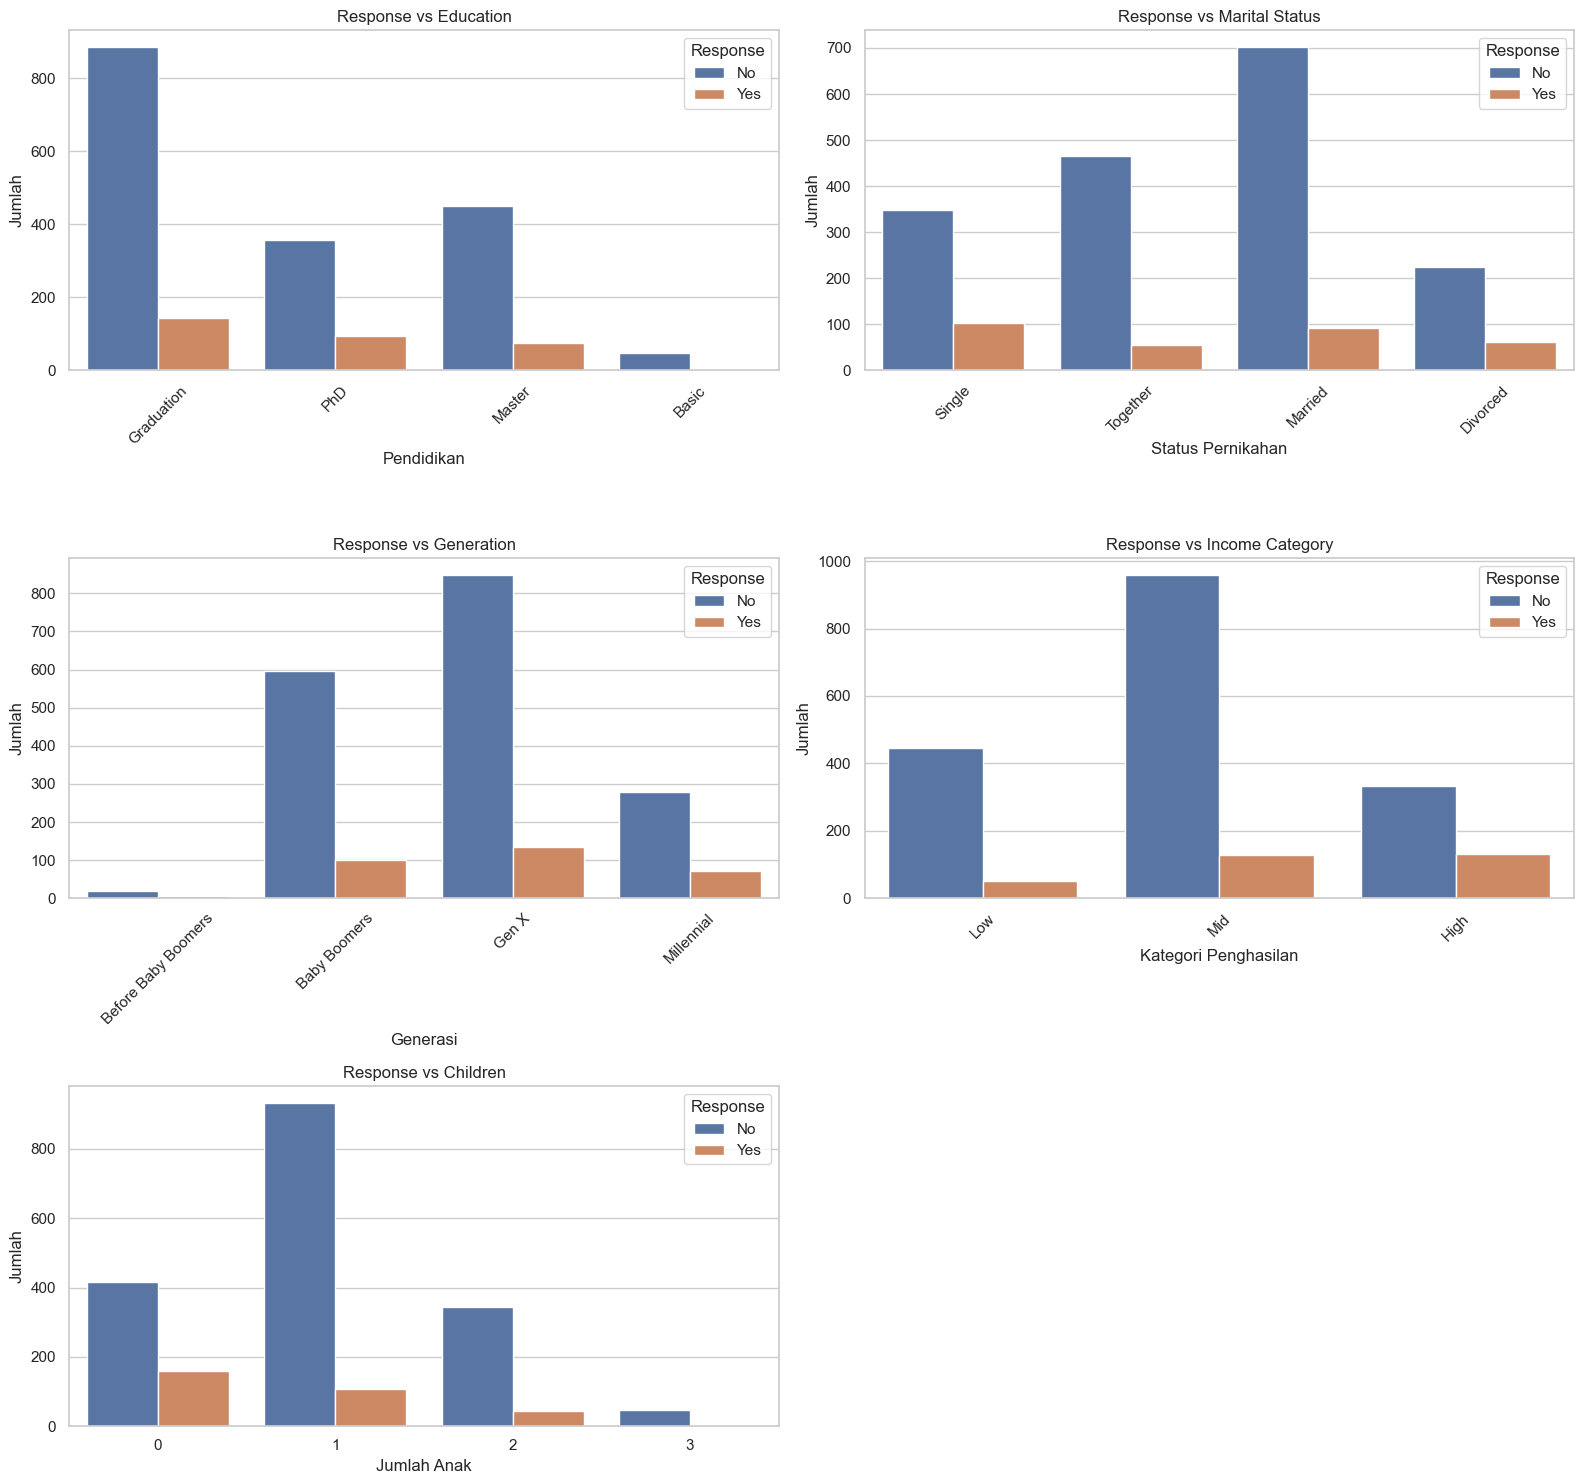

In [117]:
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Respons vs Education
sns.countplot(ax=axes[0, 0], x='Education', hue='Response', data=df)
axes[0, 0].set_title('Response vs Education')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].set_xlabel('Pendidikan')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title='Response', labels=['No', 'Yes'])

# Respons vs Marital Status
sns.countplot(ax=axes[0, 1], x='Marital_Status', hue='Response', data=df)
axes[0, 1].set_title('Response vs Marital Status')
axes[0, 1].set_ylabel('Jumlah')
axes[0, 1].set_xlabel('Status Pernikahan')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title='Response', labels=['No', 'Yes'])

# Respons vs Generation
sns.countplot(ax=axes[1, 0], x='Generation', hue='Response', data=df)
axes[1, 0].set_title('Response vs Generation')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].set_xlabel('Generasi')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Response', labels=['No', 'Yes'])

# Respons vs Income Category
sns.countplot(ax=axes[1, 1], x='CategoryIncome', hue='Response', data=df)
axes[1, 1].set_title('Response vs Income Category')
axes[1, 1].set_ylabel('Jumlah')
axes[1, 1].set_xlabel('Kategori Penghasilan')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Response', labels=['No', 'Yes'])

# Respons vs Children 
sns.countplot(ax=axes[2, 0], x='Children', hue='Response', data=df)
axes[2, 0].set_title('Response vs Children')
axes[2, 0].set_ylabel('Jumlah')
axes[2, 0].set_xlabel('Jumlah Anak')
axes[2, 0].legend(title='Response', labels=['No', 'Yes'])

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


### Campaign Response

In [119]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']

campaign_counts = pd.DataFrame({
    col: df[col].value_counts() for col in campaign_cols
}).T.fillna(0).astype(int)

campaign_counts.columns = ['Tidak Accept (0)', 'Accept (1)']

campaign_counts['Total'] = campaign_counts['Tidak Accept (0)'] + campaign_counts['Accept (1)']

campaign_counts['% Tidak Accept (0)'] = (campaign_counts['Tidak Accept (0)'] / campaign_counts['Total'] * 100).round(2).astype(str) + '%'
campaign_counts['% Accept (1)'] = (campaign_counts['Accept (1)'] / campaign_counts['Total'] * 100).round(2).astype(str) + '%'

campaign_counts = campaign_counts[['Tidak Accept (0)', '% Tidak Accept (0)', 'Accept (1)', '% Accept (1)']]

campaign_counts

Tidak Accept (0) % Tidak Accept (0)  Accept (1) % Accept (1)
AcceptedCmp1              1919             93.43%         135        6.57%
AcceptedCmp2              2028             98.73%          26        1.27%
AcceptedCmp3              1903             92.65%         151        7.35%
AcceptedCmp4              1896             92.31%         158        7.69%
AcceptedCmp5              1907             92.84%         147        7.16%
Response                  1741             84.76%         313       15.24%

In [120]:
mask_accepted = (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']] == 1).any(axis=1)

jumlah_accept = mask_accepted.sum()
jumlah_tidak_accept = len(df) - jumlah_accept
total_pelanggan = len(df)

accept_rate = round(jumlah_accept / total_pelanggan * 100, 2)
tidak_accept_rate = round(jumlah_tidak_accept / total_pelanggan * 100, 2)

print(f"Jumlah pelanggan yang menerima campaign (min 1): {jumlah_accept}")
print(f"Accept Rate: {accept_rate}%")
print(f"Jumlah pelanggan yang tidak menerima campaign: {jumlah_tidak_accept}")
print(f"Tidak Accept Rate: {tidak_accept_rate}%")

total_totalamount = df.groupby(mask_accepted)['TotalAmount'].sum()
print("\nTotal pengeluaran berdasarkan status campaign:")
print(total_totalamount.rename(index={True: 'Accept', False: 'Tidak Accept'}))


Jumlah pelanggan yang menerima campaign (min 1): 568
Accept Rate: 27.65%
Jumlah pelanggan yang tidak menerima campaign: 1486
Tidak Accept Rate: 72.35%

Total pengeluaran berdasarkan status campaign:
Tidak Accept    681283
Accept          564358
Name: TotalAmount, dtype: int64


### Monthly Trend of Total Response Rate

In [122]:
monthly_trend = df.groupby('year_month').agg({
    'ID': 'count',                  
    'AllResponse': ['sum', 'mean']     
})

monthly_trend.columns = ['customer_count', 'response_count', 'response_rate']
monthly_trend = monthly_trend.reset_index()

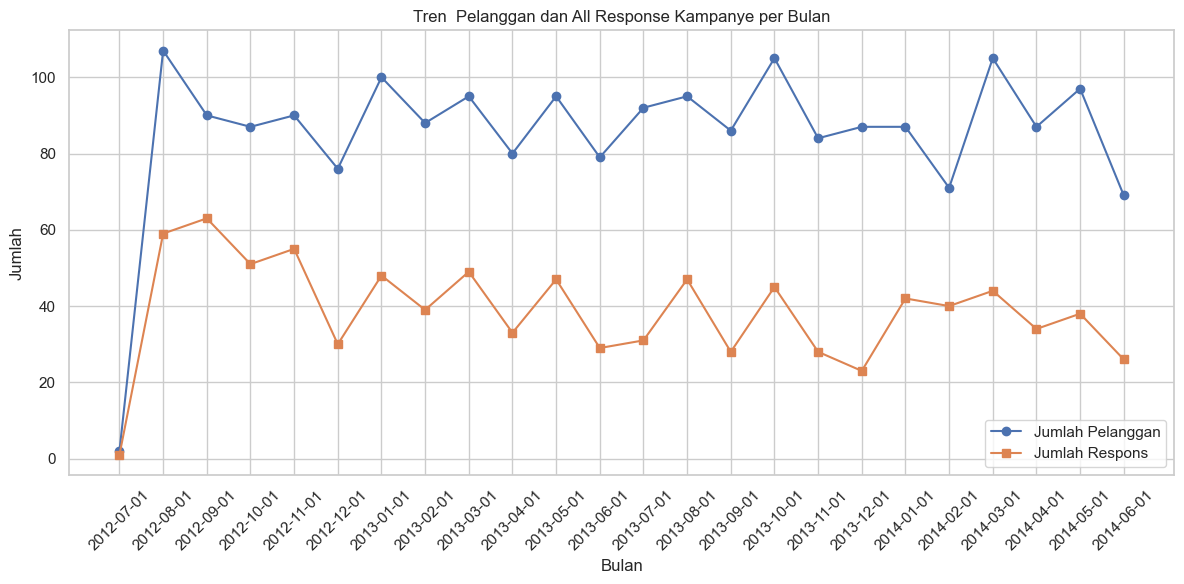

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['customer_count'], marker='o', label='Jumlah Pelanggan')
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['response_count'], marker='s', label='Jumlah Respons')
plt.title('Tren  Pelanggan dan All Response Kampanye per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Total Response Rate Trend by Month 

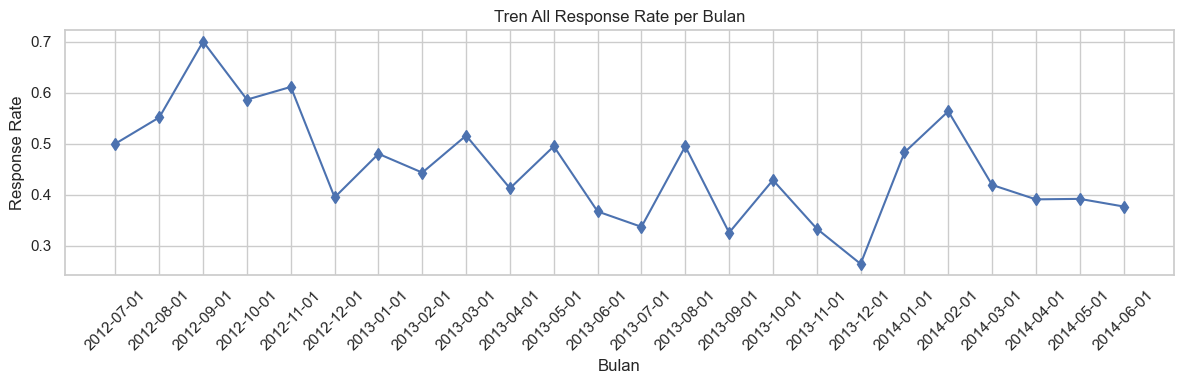

In [125]:
plt.figure(figsize=(12, 4))
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['response_rate'], marker='d')
plt.title('Tren All Response Rate per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Discount Rate Trend by Month

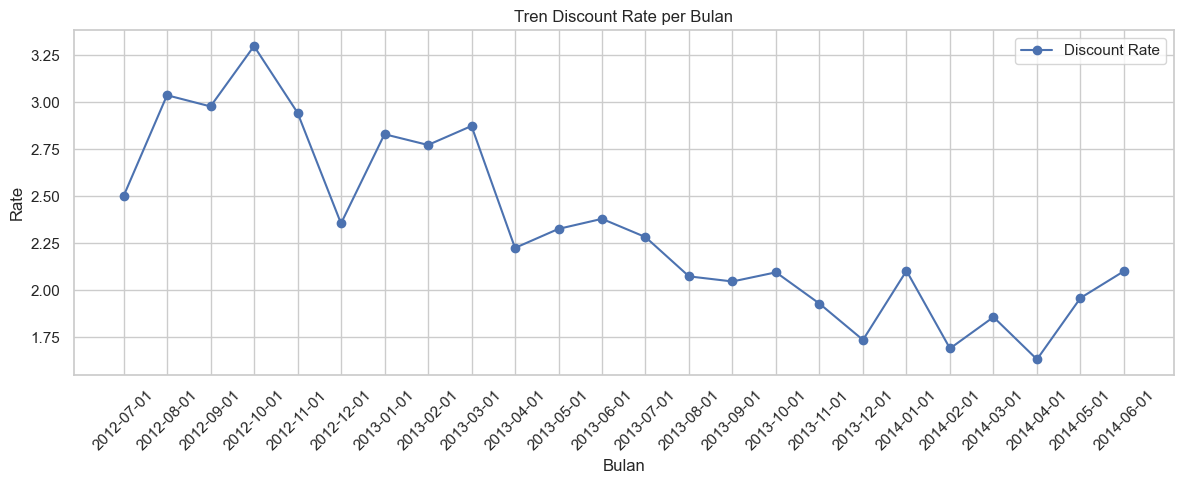

In [127]:
monthly_trend = df.groupby('year_month').agg({
    'ID': 'count',                  
    'NumDealsPurchases': 'sum'      
})

monthly_trend.columns = ['customer_count', 'total_deals_purchases']

monthly_trend['discount_rate'] = (
    monthly_trend['total_deals_purchases'] / monthly_trend['customer_count'])

monthly_trend = monthly_trend.reset_index()

plt.figure(figsize=(12, 5))
plt.plot(monthly_trend['year_month'].astype(str), monthly_trend['discount_rate'], marker='o', label='Discount Rate')
plt.title('Tren Discount Rate per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Average Deal Purchase Demographics

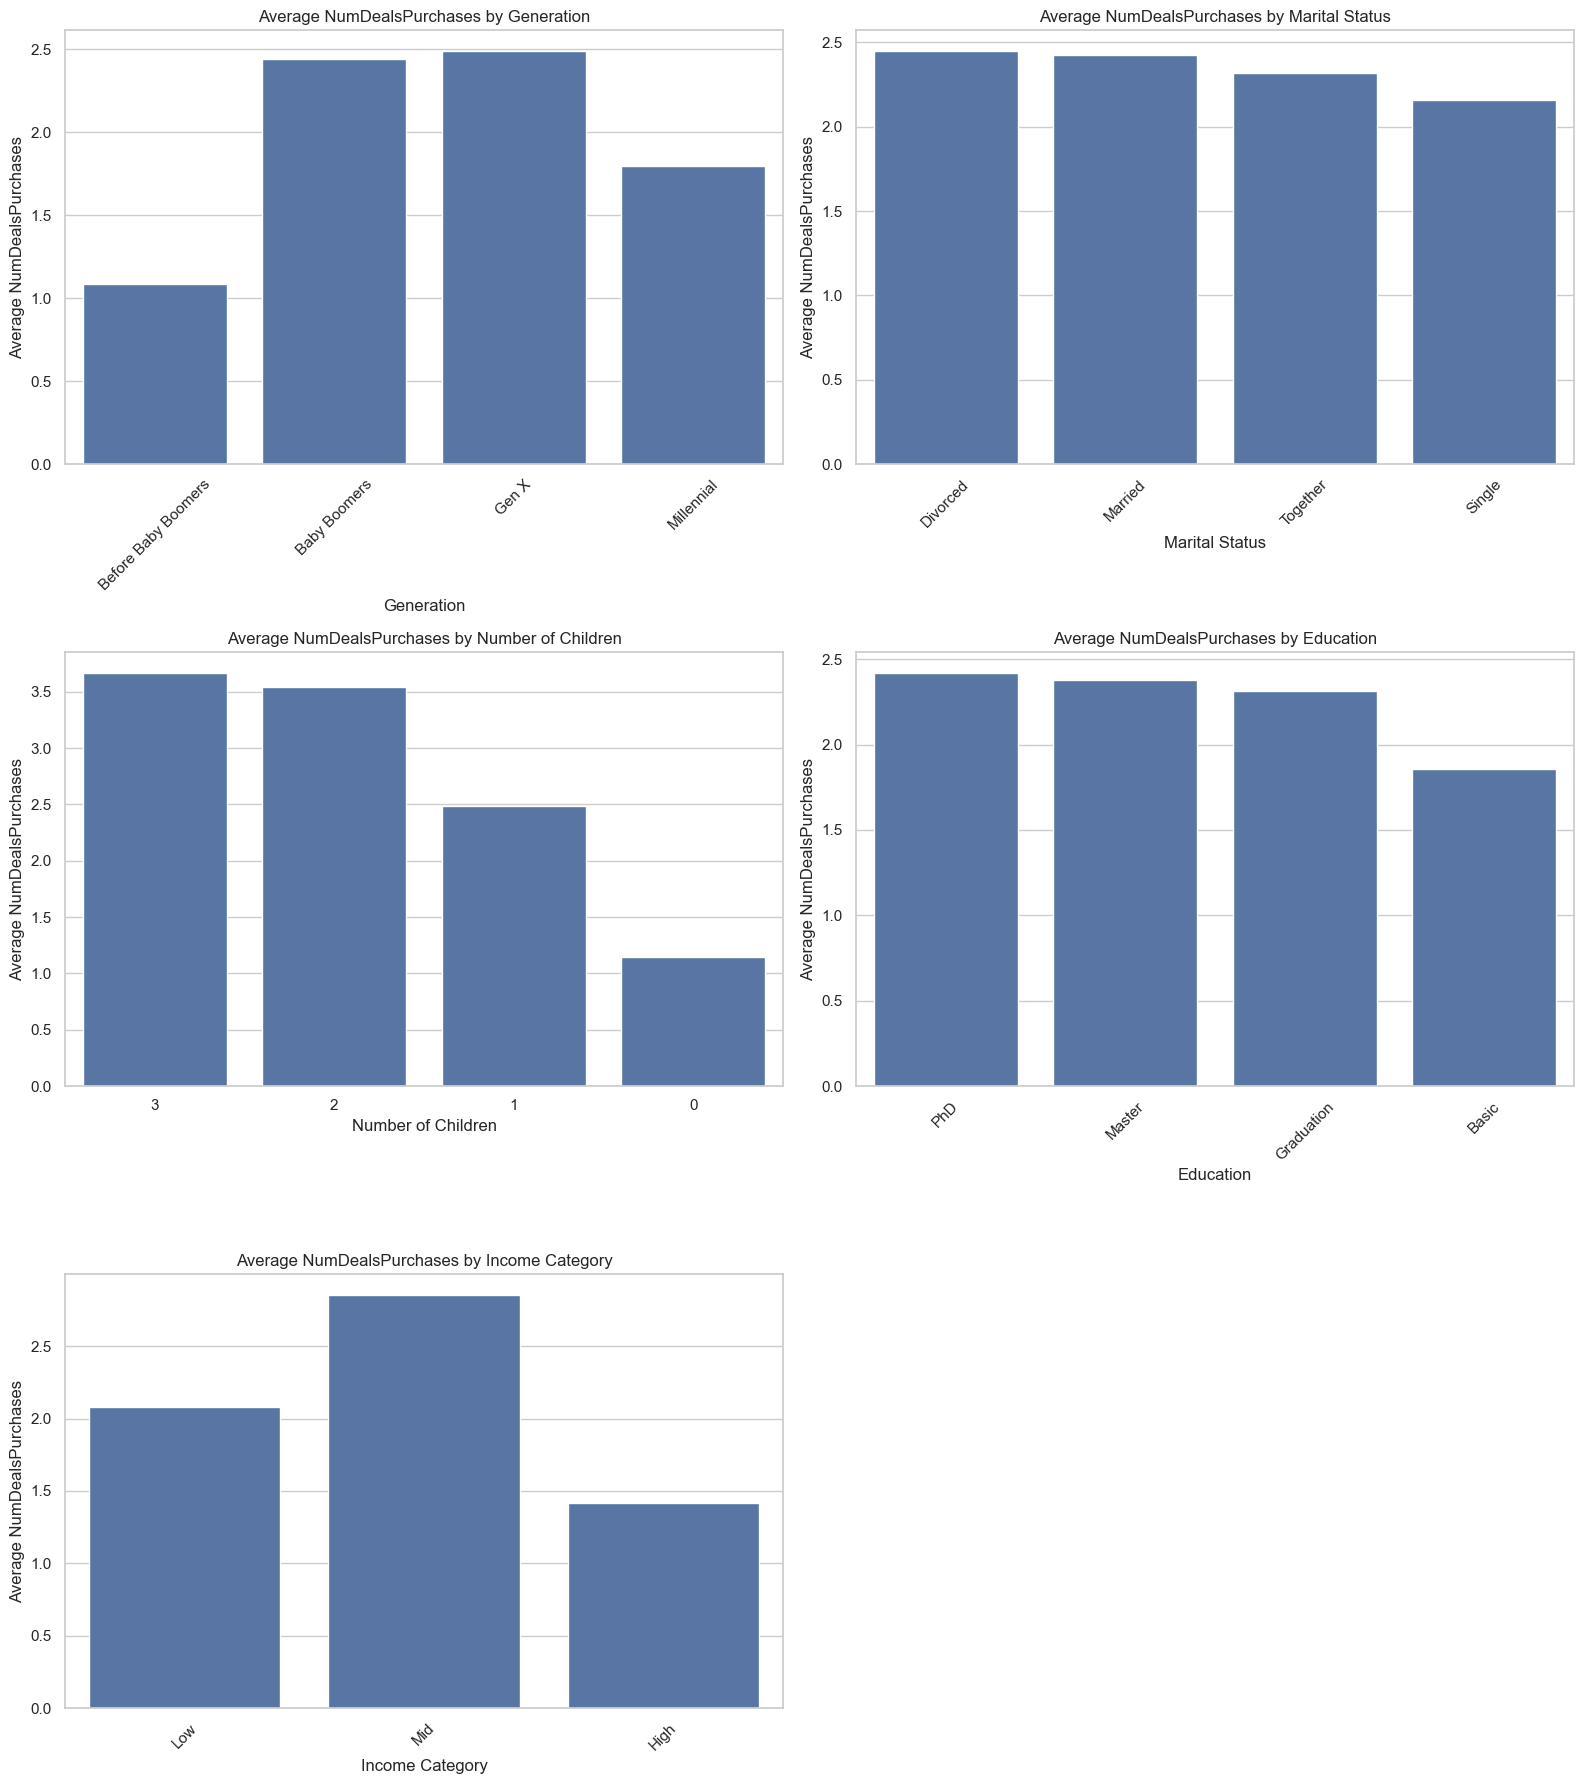

In [129]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# NumDealsPurchases by Generation
num_deals_gen = df.groupby('Generation')['NumDealsPurchases'].mean().sort_values(ascending=False)
sns.barplot(x=num_deals_gen.index, y=num_deals_gen.values, ax=axes[0, 0])
axes[0, 0].set_title('Average NumDealsPurchases by Generation')
axes[0, 0].set_xlabel('Generation')
axes[0, 0].set_ylabel('Average NumDealsPurchases')
axes[0, 0].tick_params(axis='x', rotation=45)

# NumDealsPurchases by Marital Status
num_deals_marital = df.groupby('Marital_Status')['NumDealsPurchases'].mean().sort_values(ascending=False)
sns.barplot(x=num_deals_marital.index, y=num_deals_marital.values, ax=axes[0, 1])
axes[0, 1].set_title('Average NumDealsPurchases by Marital Status')
axes[0, 1].set_xlabel('Marital Status')
axes[0, 1].set_ylabel('Average NumDealsPurchases')
axes[0, 1].tick_params(axis='x', rotation=45)

# NumDealsPurchases by Children
num_deals_children = df.groupby('Children')['NumDealsPurchases'].mean().sort_values(ascending=False)
sns.barplot(x=num_deals_children.index.astype(str), y=num_deals_children.values, ax=axes[1, 0])
axes[1, 0].set_title('Average NumDealsPurchases by Number of Children')
axes[1, 0].set_xlabel('Number of Children')
axes[1, 0].set_ylabel('Average NumDealsPurchases')

# NumDealsPurchases by Education
num_deals_edu = df.groupby('Education')['NumDealsPurchases'].mean().sort_values(ascending=False)
sns.barplot(x=num_deals_edu.index, y=num_deals_edu.values, ax=axes[1, 1])
axes[1, 1].set_title('Average NumDealsPurchases by Education')
axes[1, 1].set_xlabel('Education')
axes[1, 1].set_ylabel('Average NumDealsPurchases')
axes[1, 1].tick_params(axis='x', rotation=45)

# NumDealsPurchases by Income Category
num_deals_income = df.groupby('CategoryIncome')['NumDealsPurchases'].mean().sort_values(ascending=False)
sns.barplot(x=num_deals_income.index, y=num_deals_income.values, ax=axes[2, 0])
axes[2, 0].set_title('Average NumDealsPurchases by Income Category')
axes[2, 0].set_xlabel('Income Category')
axes[2, 0].set_ylabel('Average NumDealsPurchases')
axes[2, 0].tick_params(axis='x', rotation=45)

axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

### Purchases by Channel

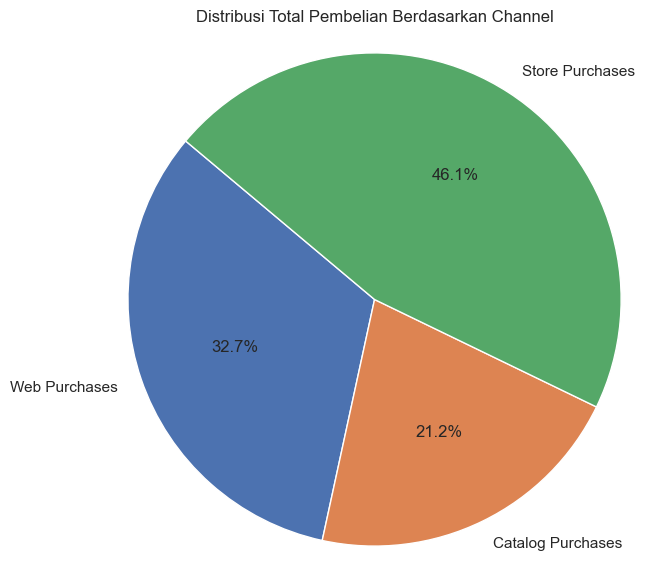

In [131]:
purchase_totals = {
    'Web Purchases': df['NumWebPurchases'].sum(),
    'Catalog Purchases': df['NumCatalogPurchases'].sum(),
    'Store Purchases': df['NumStorePurchases'].sum()
}

labels = list(purchase_totals.keys())
sizes = list(purchase_totals.values())

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Total Pembelian Berdasarkan Channel')
plt.axis('equal')  
plt.show()


In [132]:
df_channel = df.melt(
    id_vars=[],
    value_vars=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
    var_name='Channel',
    value_name='Jumlah_Pembelian'
)

df_channel['Channel'] = df_channel['Channel'].replace({
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store'
})


### Discount Distribution

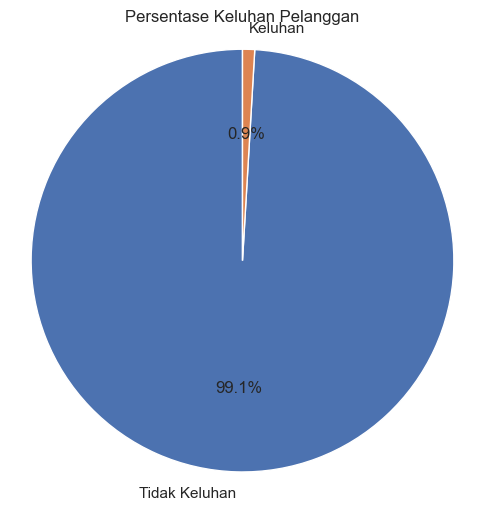

In [134]:
complaint_counts = df['Complain'].value_counts()

labels = ['Tidak Keluhan', 'Keluhan']
sizes = [complaint_counts.get(0, 0), complaint_counts.get(1, 0)]

plt.figure(figsize=(6, 6))
plt.title('Persentase Keluhan Pelanggan')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


### Average Response by RFM

In [136]:
response_rfm = df.groupby('Response')[['Recency', 'FreqPurchasesPerChannel', 'TotalAmount']].mean().reset_index()
response_rfm.columns = ['Response', 'Recency', 'Frequency', 'Monetary']
response_rfm


Response    Recency  Frequency    Monetary
0         0  51.457209  12.047099  539.290638
1         1  35.063898  15.284345  979.987220

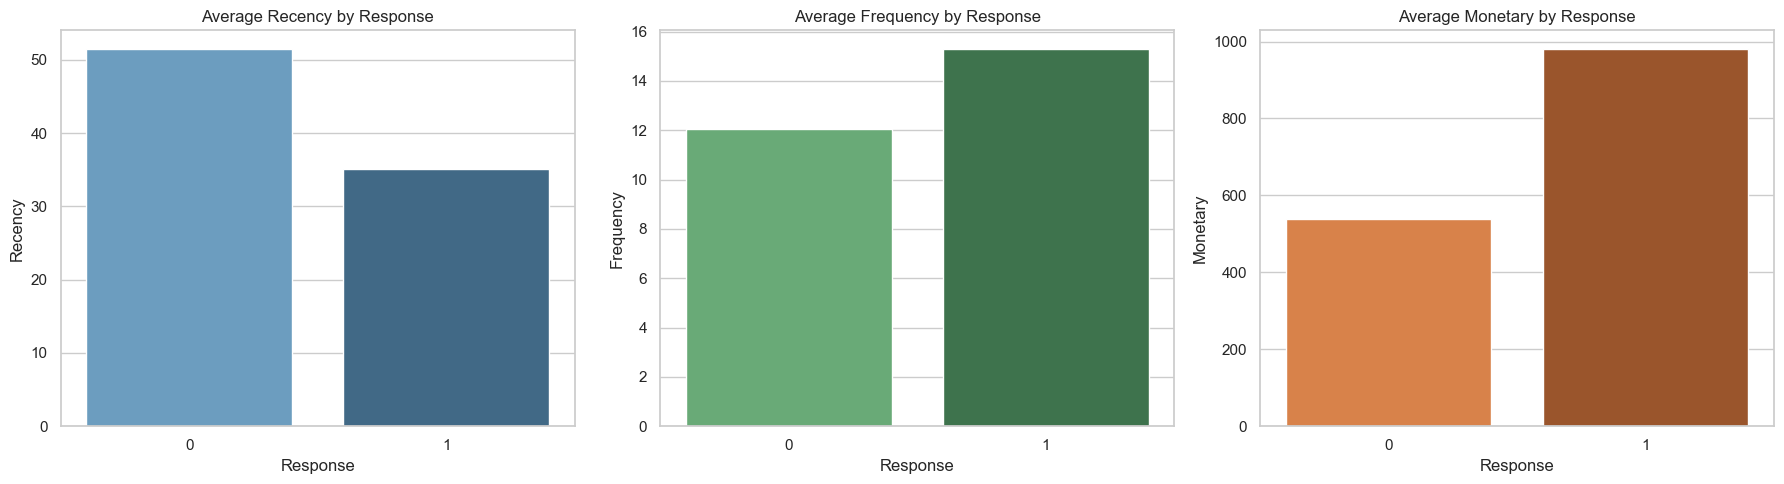

In [137]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Recency
sns.barplot(data=response_rfm, x='Response', y='Recency', ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Recency by Response')
axes[0].set_ylabel('Recency')
axes[0].set_xlabel('Response')

# Plot Frequency
sns.barplot(data=response_rfm, x='Response', y='Frequency', ax=axes[1], palette='Greens_d')
axes[1].set_title('Average Frequency by Response')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Response')

# Plot Monetary
sns.barplot(data=response_rfm, x='Response', y='Monetary', ax=axes[2], palette='Oranges_d')
axes[2].set_title('Average Monetary by Response')
axes[2].set_ylabel('Monetary')
axes[2].set_xlabel('Response')

plt.tight_layout()
plt.show()


### RFM

### What is RFM?

RFM stands for:

- Recency: How recently a customer made their last purchase.

- Frequency: How often a customer makes purchases within a certain period.

- Monetary: How much money a customer spends on purchases.

The purpose of RFM is to segment customers into categories based on their behavior.

In [140]:
reference_date = df['Dt_Customer'].max() + timedelta(days=1)
reference_date

Timestamp('2014-06-30 00:00:00')

In [141]:
df['Recency'] = (reference_date - df['Dt_Customer']).dt.days

In [142]:
rfm = df[['ID', 'Recency', 'FreqPurchasesPerChannel', 'TotalAmount','Response']].copy()
rfm.columns = ['ID', 'Recency', 'Frequency', 'Monetary','Response']


In [143]:

quantiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([0.2,0.4,0.6,0.8])

def RScore5(x, p, quantiles):
    if pd.isna(x):
        return np.nan
    if p == 'Recency':  
        if x <= quantiles[p][0.2]:
            return 5
        elif x <= quantiles[p][0.4]:
            return 4
        elif x <= quantiles[p][0.6]:
            return 3
        elif x <= quantiles[p][0.8]:
            return 2
        else:
            return 1
    else: 
        if x <= quantiles[p][0.2]:
            return 1
        elif x <= quantiles[p][0.4]:
            return 2
        elif x <= quantiles[p][0.6]:
            return 3
        elif x <= quantiles[p][0.8]:
            return 4
        else:
            return 5

rfm['R_Score'] = rfm['Recency'].apply(lambda x: RScore5(x, 'Recency', quantiles))
rfm['F_Score'] = rfm['Frequency'].apply(lambda x: RScore5(x, 'Frequency', quantiles))
rfm['M_Score'] = rfm['Monetary'].apply(lambda x: RScore5(x, 'Monetary', quantiles))

In [144]:
rfm.head()

ID  Recency  Frequency  Monetary  Response  R_Score  F_Score  M_Score
0  5524      664         22      1617         1        1        5        5
1  2174      114          4        27         0        5        1        1
2  4141      313         20       776         0        3        4        4
3  6182      140          6        53         0        5        2        1
4  5324      162         14       422         0        4        3        3

#### Distribution of R, F, M Scores

In [146]:
rfm['R_Score'].value_counts()


R_Score
4    413
3    412
2    412
5    411
1    406
Name: count, dtype: int64

In [147]:
rfm['F_Score'].value_counts()

F_Score
1    476
3    426
4    419
2    379
5    354
Name: count, dtype: int64

In [148]:
rfm['M_Score'].value_counts()

M_Score
1    414
4    412
5    410
3    410
2    408
Name: count, dtype: int64

In [149]:
rfm['RFM_Segment'] = rfm['R_Score'].map(str) + rfm['F_Score'].map(str) + rfm['M_Score'].map(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

In [150]:
rfm.head()

ID  Recency  Frequency  Monetary  Response  R_Score  F_Score  M_Score  \
0  5524      664         22      1617         1        1        5        5   
1  2174      114          4        27         0        5        1        1   
2  4141      313         20       776         0        3        4        4   
3  6182      140          6        53         0        5        2        1   
4  5324      162         14       422         0        4        3        3   

  RFM_Segment  RFM_Score  
0         155         11  
1         511          7  
2         344         11  
3         521          8  
4         433         10

In [151]:
rfm['Weighted_Score'] = (
    rfm['R_Score'].astype(int) * 0.4 +
    rfm['F_Score'].astype(int) * 0.4 +
    rfm['M_Score'].astype(int) * 0.2
)

quantiles = rfm['Weighted_Score'].quantile([0.05, 0.2, 0.4, 0.55, 0.7, 0.9]).to_dict()

def segment_customer(score):
    if score >= quantiles[0.9]:
        return 'Champions'
    elif score >= quantiles[0.7]:
        return 'Loyal Customers'
    elif score >= quantiles[0.55]:
        return 'Potential Loyalists'
    elif score >= quantiles[0.4]:
        return 'New Customers'
    elif score >= quantiles[0.2]:
        return 'At Risk'
    elif score >= quantiles[0.05]:
        return 'Hibernating'
    else:
        return 'Lost Customers'

rfm['Segment'] = rfm['Weighted_Score'].apply(segment_customer)

# Urutkan segmen sesuai keinginan
segment_order = [
    'Champions',
    'Loyal Customers',
    'Potential Loyalists',
    'New Customers',
    'At Risk',
    'Hibernating',
    'Lost Customers'
]

rfm['Segment'] = pd.Categorical(rfm['Segment'], categories=segment_order, ordered=True)

print(rfm['Segment'].value_counts().sort_index())


Segment
Champions              259
Loyal Customers        448
Potential Loyalists    297
New Customers          432
At Risk                251
Hibernating            307
Lost Customers          60
Name: count, dtype: int64


#### Percentage of customers per segment (7 segments)

In [153]:
segment_counts = rfm['Segment'].value_counts().sort_index()
segment_percentages = (segment_counts / len(rfm) * 100).round(2)

summary = pd.DataFrame({
    'Jumlah Pelanggan': segment_counts,
    'Persentase (%)': segment_percentages
})

print('\nRingkasan Segmentasi Pelanggan:')
print(summary)



Ringkasan Segmentasi Pelanggan:
                     Jumlah Pelanggan  Persentase (%)
Segment                                              
Champions                         259           12.61
Loyal Customers                   448           21.81
Potential Loyalists               297           14.46
New Customers                     432           21.03
At Risk                           251           12.22
Hibernating                       307           14.95
Lost Customers                     60            2.92


### Treemap of Customer Segmentation Counts

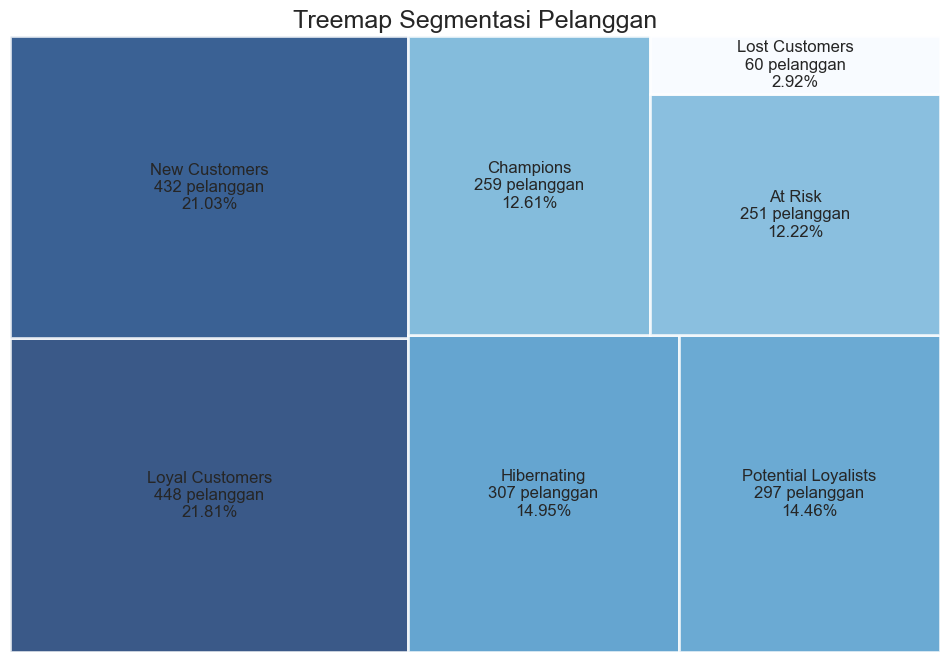

In [155]:
treemap_data = rfm['Segment'].value_counts().reset_index()
treemap_data.columns = ['Segment', 'Count of Customer']

treemap_data['Persentase (%)'] = (treemap_data['Count of Customer'] / len(rfm) * 100).round(2)

norm = plt.Normalize(treemap_data['Count of Customer'].min(), treemap_data['Count of Customer'].max())
colors = plt.cm.Blues(norm(treemap_data['Count of Customer']))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=treemap_data['Count of Customer'],
    label=[f"{seg}\n{count} pelanggan\n{perc}%" for seg, count, perc in zip(treemap_data['Segment'], treemap_data['Count of Customer'], treemap_data['Persentase (%)'])],
    color=colors,
    alpha=0.8,
    edgecolor="white",
    linewidth=2
)

plt.title('Treemap Segmentasi Pelanggan', fontsize=18)
plt.axis('off')
plt.show()


#### Correlation RFM Scores

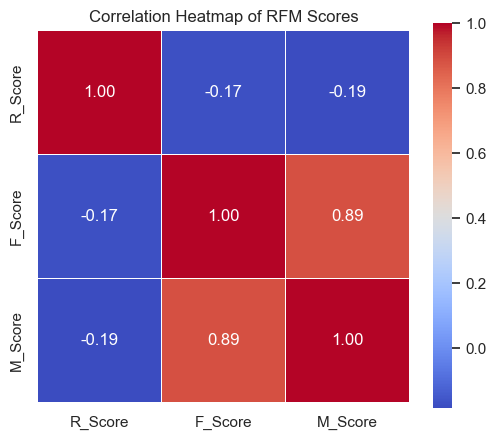

In [157]:
rfm_scores = rfm[['R_Score', 'F_Score', 'M_Score']].astype(float)

corr = rfm_scores.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

plt.title('Correlation Heatmap of RFM Scores')
plt.show()

- Frequency and Monetary have a strong positive correlation, meaning customers who buy frequently also tend to spend larger amounts.

- Recency is usually inversely related to Frequency (the more recent the purchase, the more frequent the buying tends to be).

####  Total Recency, Frequency, and Monetary by Segment

In [160]:
segment_sum = rfm.groupby('Segment')[['Recency','Frequency', 'Monetary']].sum()
print("Total Frequency dan Monetary per segmen:")
print(segment_sum)


Total Frequency dan Monetary per segmen:
                     Recency  Frequency  Monetary
Segment                                          
Champions              41805       5360    331175
Loyal Customers       142175       7878    420685
Potential Loyalists   115713       4531    204944
New Customers         143051       4260    207189
At Risk               100346       1940     55068
Hibernating           145737       1558     23688
Lost Customers         37613        231      2892


### Purchase Channel by Segment

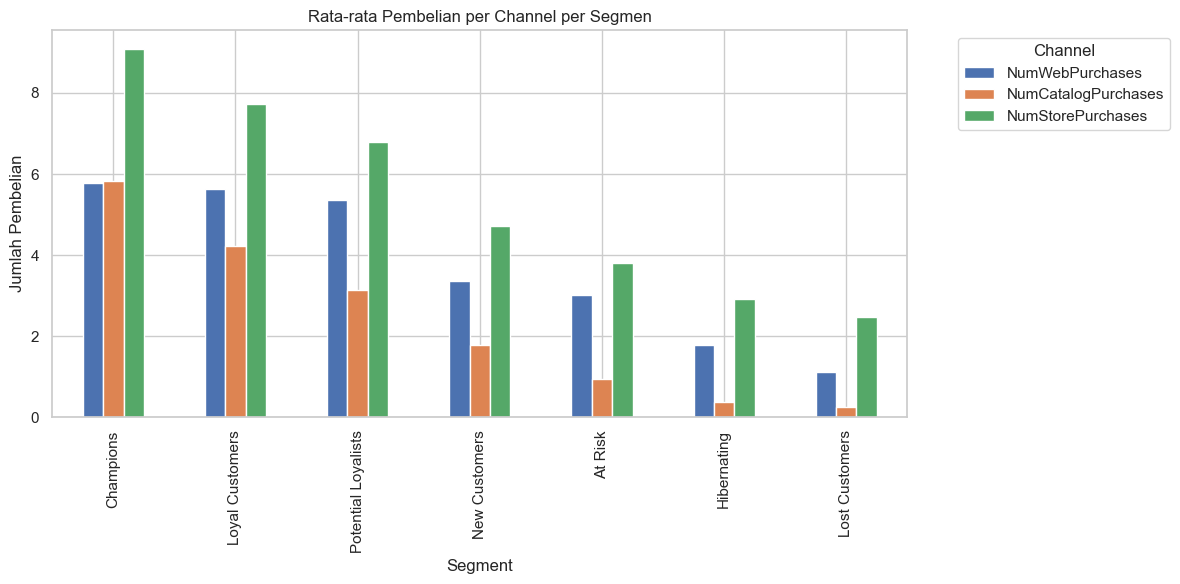

In [162]:
channel_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_merged = rfm.merge(df[['ID'] + channel_cols], on='ID', how='left')

channel_per_segment = df_merged.groupby('Segment')[channel_cols].mean()

channel_per_segment.plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Pembelian per Channel per Segmen')
plt.ylabel('Jumlah Pembelian')
plt.xlabel('Segment')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Average Spending per Segment

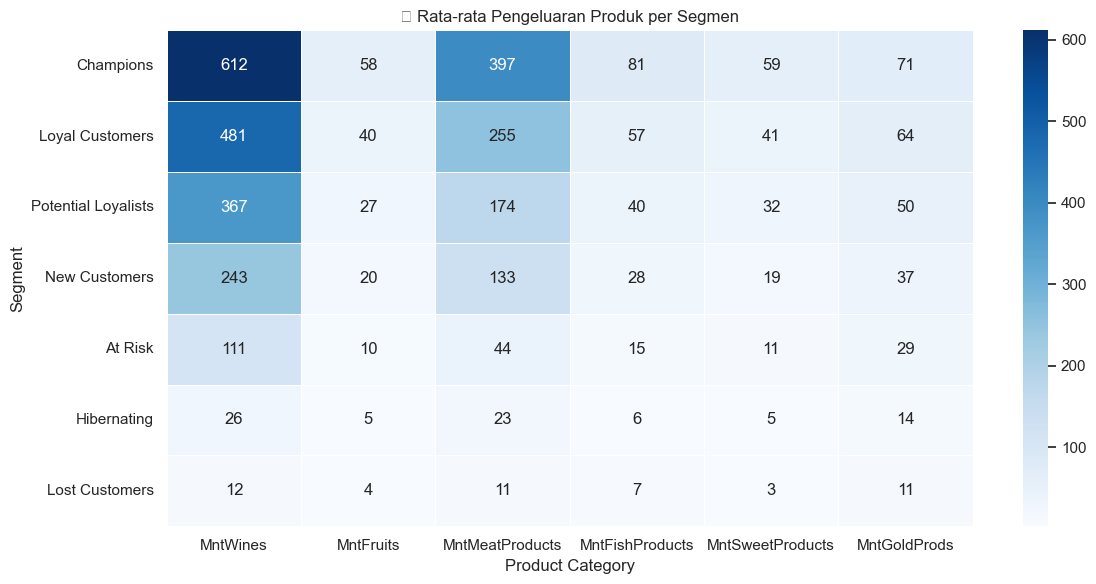

In [164]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

df_merged = rfm.merge(df[['ID'] + product_cols], on='ID', how='left')

product_per_segment = df_merged.groupby('Segment')[product_cols].mean()

plt.figure(figsize=(12, 6))
sns.heatmap(product_per_segment, annot=True, cmap="Blues", fmt=".0f", linewidths=0.5)
plt.title('📦 Rata-rata Pengeluaran Produk per Segmen')
plt.ylabel('Segment')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


### Segmentasi RFM VS Response

In [166]:
rfm

ID  Recency  Frequency  Monetary  Response  R_Score  F_Score  \
0      5524      664         22      1617         1        1        5   
1      2174      114          4        27         0        5        1   
2      4141      313         20       776         0        3        4   
3      6182      140          6        53         0        5        2   
4      5324      162         14       422         0        4        3   
...     ...      ...        ...       ...       ...      ...      ...   
2232   8080      682          3        22         0        1        1   
2235  10870      382         16      1341         0        3        4   
2237   7270      156         18      1241         0        4        4   
2238   8235      157         21       843         0        4        5   
2239   9405      623          8       172         1        1        2   

      M_Score RFM_Segment  RFM_Score  Weighted_Score              Segment  
0           5         155         11             3.4  Potential Loyalists  
1           1         511          7             2.6        New Customers  
2           4         344         11             3.6      Loyal Customers  
3           1         521          8             3.0        New Customers  
4           3         433         10             3.4      Loyal Customers  
...       ...         ...        ...             ...                  ...  
2232        1         111          3             1.0       Lost Customers  
2235        5         345         12             3.8      Loyal Customers  
2237        5         445         13             4.2            Champions  
2238        4         454         13             4.4            Champions  
2239        2         122          5             1.6          Hibernating  

[2054 rows x 12 columns]

In [167]:
rfm['AllResponse'] = df['AllResponse']
response_counts = rfm.groupby(['Segment', 'AllResponse']).size().unstack(fill_value=0)

response_counts['AllResponse'] = response_counts.sum(axis=1)

response_counts['AllResponse 0 (%)'] = (response_counts[0] / response_counts['AllResponse'] * 100).round(2).astype(str) + '%'
response_counts['AllResponse 1 (%)'] = (response_counts[1] / response_counts['AllResponse'] * 100).round(2).astype(str) + '%'

result = response_counts[['AllResponse', 0, 'AllResponse 0 (%)', 1, 'AllResponse 1 (%)']]

result.columns = ['AllResponse', 'AllResponse 0', 'AllResponse 0 (%)', 'AllResponse 1', 'AllResponse 1 (%)']

result.reset_index()


Segment  AllResponse  AllResponse 0 AllResponse 0 (%)  \
0            Champions          259            127            49.03%   
1      Loyal Customers          448            309            68.97%   
2  Potential Loyalists          297            218             73.4%   
3        New Customers          432            320            74.07%   
4              At Risk          251            206            82.07%   
5          Hibernating          307            258            84.04%   
6       Lost Customers           60             48             80.0%   

   AllResponse 1 AllResponse 1 (%)  
0             66            25.48%  
1             78            17.41%  
2             48            16.16%  
3             70             16.2%  
4             35            13.94%  
5             42            13.68%  
6              7            11.67%

#### Trend of All Responses per Segment

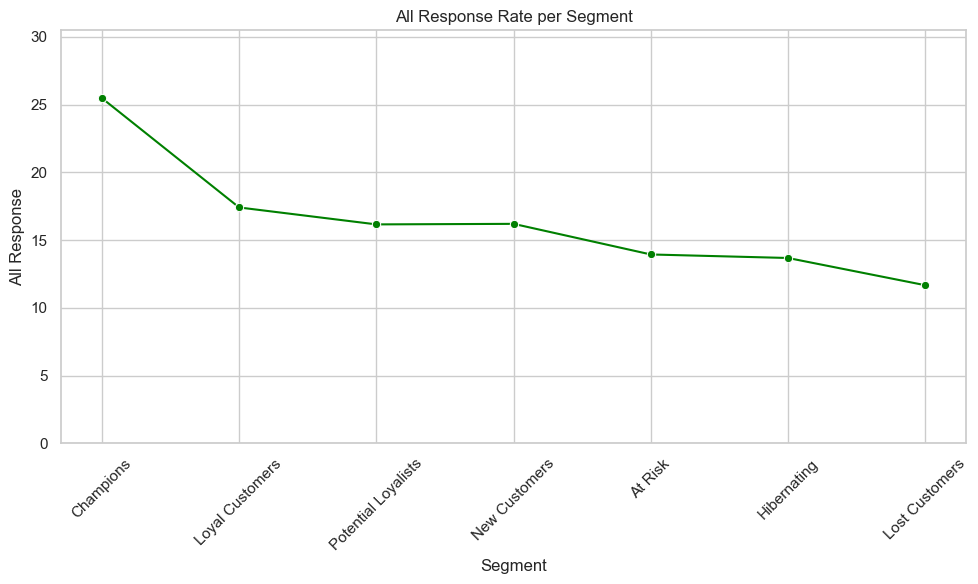

In [169]:
df_plot = result.reset_index()
df_plot['AllResponse 1 (%)'] = df_plot['AllResponse 1 (%)'].str.replace('%','').astype(float)

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Segment', y='AllResponse 1 (%)', data=df_plot, marker='o', color='green')

plt.title('All Response Rate per Segment')
plt.xlabel('Segment')
plt.ylabel('All Response')
plt.xticks(rotation=45)
plt.ylim(0, df_plot['AllResponse 1 (%)'].max() + 5)
plt.tight_layout()
plt.show()

### Segmentation Based on Average RFM

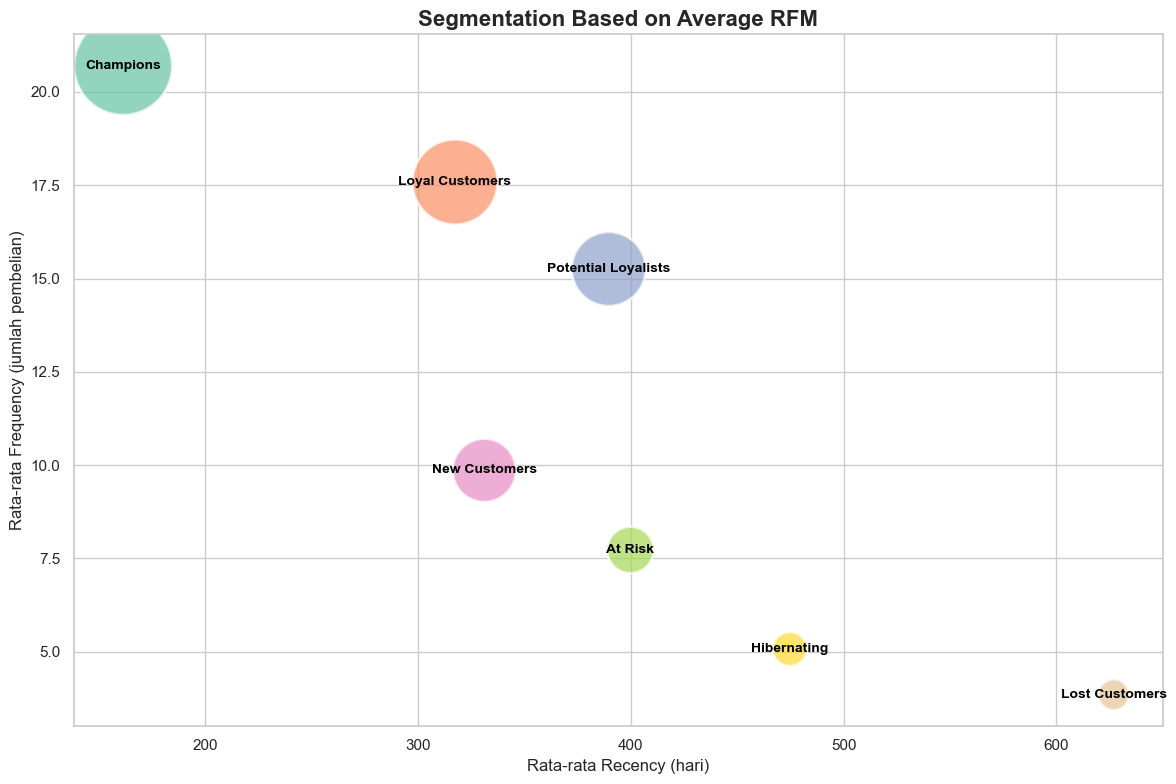

In [171]:
rfm_segment = rfm.groupby('Segment').agg({
    'Recency': 'mean',     
    'Frequency': 'mean',   
    'Monetary': 'mean'     
}).reset_index()

rfm_segment.rename(columns={
    'Recency': 'Avg_Recency',
    'Frequency': 'Avg_Frequency',
    'Monetary': 'Avg_Monetary'
}, inplace=True)

plt.figure(figsize=(12, 8))  

chart = sns.scatterplot(
    data=rfm_segment,
    x='Avg_Recency',             
    y='Avg_Frequency',           
    size='Avg_Monetary',         
    hue='Segment',               
    palette='Set2',
    alpha=0.7,                   
    sizes=(500, 5000),          
    legend=False                 
)

for _, row in rfm_segment.iterrows():
    plt.text(
        row['Avg_Recency'],
        row['Avg_Frequency'],
        row['Segment'],
        ha='center', va='center',
        fontsize=10, weight='bold',
        color='black'
    )

plt.gca().invert_xaxis()
plt.title("Segmentation Based on Average RFM", fontsize=16, weight='bold')
plt.xlabel('Rata-rata Recency (hari)', fontsize=12)
plt.ylabel('Rata-rata Frequency (jumlah pembelian)', fontsize=12)

plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()


 ## Business Conclusion

<span style="font-size:20px; font-family: monospace;">`Counclusion`</span>


Spending per Product Category
Based on Median:

1. Wines (174.5) is the category with the highest spending, indicating large transaction values or regular purchases.
2. Meat Products (67.0) rank second, highlighting their importance in shopping patterns.
3. Gold Products (24.0) play a moderate role, possibly high in value but purchased less frequently.
4. Fish (12.0), Fruits (8.0), and Sweet Products (8.0) have low median spending, likely due to lower prices or less frequent purchases.

Customer Segments (RFM):

1. Champions: Best customers; recent, frequent, and high-value buyers. Their loyalty needs to be maintained.
2. Loyal Customers: Frequent and high-value buyers, though not very recent. Worth keeping and appreciating.
3. At Risk: Previously active but now becoming inactive. Requires approaches to prevent loss.
4. Hibernating: Infrequent and haven’t purchased for a long time. Can be targeted with reactivation campaigns.
5. New Customers: Recently made purchases but not yet regular. Need education and encouragement for repeat buying.
6. Lost Customers: Have been inactive for a very long time. Low potential, can be given low priority.

Campaign Effectiveness:

Out of the total customers, 568 people (27.65%) responded to the campaign (responded to at least one campaign), while 1,486 people (72.35%) did not respond at all.
Although the non-responding group is larger, they actually generated a higher total expenditure amounting to 681,283, compared to the group that received the campaign, which only generated 564,358,111.

Recency (Last Campaign) vs Response:

1. Responding Customers Are Longer Inactive
The campaign might be more appealing to customers who have not interacted for a long time.

2. New or Active Customers Are Less Interested
Customers with shorter recency (recently active) tended to respond less. This could mean the campaign wasn’t attractive enough for active customers, or that the campaign was targeted at dormant customers.

Conclusion: The campaign successfully attracted dormant customers to respond again.

<span style="font-size:20px; font-family: monospace;">`Recomendation`</span>


1. Champions

    - Provide loyalty programs and exclusive discounts
    
    - Offer premium products or upselling opportunities
    
    - Engage them in brand communities

2. Loyal Customers

    - Send personalized promotions and product education
    
    - Create referral programs
    
    - Organize special events for loyal customers

3. At Risk

    - Send “We Miss You” offers
    
    - Analyze reasons for decline and offer relevant products
    
    - Run win-back programs with special incentives

4. Hibernating

    - Conduct customer satisfaction surveys
    
    - Offer large discounts or bundled packages
    
    - Send engaging and relevant content

5. New Customers

    - Build relationships through product education
    
    - Provide special offers for the next purchase
    
    - Send tips and product reviews

6. Lost Customers

    - Reactivation campaigns with big discounts (if feasible)
    
    - Focus on customers with potential to return
    
    - Remove irrelevant data

#### Export CSV

In [180]:
df_rfm = pd.merge(df, rfm, on='ID', how='inner')

In [181]:
df_rfm.to_csv('supermarket_capstone.csv', index=False)

## Thank You!